In [184]:
### at month change, must recode in places marked fix

# uses first sheet of scb excel
### USES fhm_scb_dead.csv FHM sheet antal avlidna per dag
# fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])

# historical death data from: (in scb_dead_per_month.csv)
# http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101G/ManadFoddDod/table/tableViewLayout1/

#### !!!!! ANOMALY in SCB data: historical death data for (at least ) 2019 from statistikdatabasen 
# http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101G/ManadFoddDod/table/tableViewLayout1/
# does not concur with death data 2019 in the preliminary data! 

### DUE to okänd dödsdag when using the daily data of the preliminary stuff - much more okänd dag than okänd månad in 
### the monthly stuff
####

# ALL DATA BASED ON SCB PREL DATA IGNORES THOSE WITH UNKNOWN DAY OF DEATH !!!


### uses 2019 population for 2020

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [185]:
def parse_scb_prel():
    
    def monthname2number(m):
        if m == 'januari' : return 1
        if m == 'februari' : return 2
        if m == 'mars' : return 3
        if m == 'april' : return 4
        if m == 'maj' : return 5
        if m == 'juni' : return 6
        if m == 'juli' : return 7
        if m == 'augusti' : return 8
        if m == 'september' : return 9
        if m == 'oktober' : return 10
        if m == 'november' : return 11
        if m == 'december' : return 12

    df = pd.read_csv('scb-dead_per_day.csv',sep=';',usecols=[1,2,3,4,5,6,7,10,11],thousands=' ')
    
    df['month'] = df['Månad'].apply(monthname2number)
    df[['Månad','month']] = df[['Månad','month']].replace(np.nan,0)
    df['month'] = df['month'].astype(int)
    
    unknown_death_day = df.iloc[-1,:7]
    
    df.drop(366,inplace=True)
    
    df = df.loc[df['2020'] != 0]
    
    #df = df.drop('Månad',axis=1)
    
    index = pd.date_range('2020-01-01',periods=len(df))
    df.index = index
    
    known_death_day = df.iloc[:,:7].sum()
    
    year_fraction = len(df) / 366
    
    unknown_death_day[['2015','2016','2017','2018','2019','2015-2019']] = unknown_death_day[
    ['2015','2016','2017','2018','2019','2015-2019']] * year_fraction
    
    dead_pct_per_day = df[['2015','2016','2017','2018','2019','2020','2015-2019']] / known_death_day
    
    all_deaths = df[['2015','2016','2017','2018','2019','2020','2015-2019']] + unknown_death_day * dead_pct_per_day
    
    all_deaths = pd.concat([all_deaths,df['Månad']],axis=1)
    
    return all_deaths
    

In [186]:
# PARAM #####
last_complete_month = '2020-07-31'
curr_pop = 10327589 #from scb.se for 2019-12-31


In [187]:
def date_parser(m):
    eng_months = {'januari' : 'January',
                 'februari' : 'February',
                 'mars' : 'March',
                 'april' : 'April',
                 'maj' : 'May',
                 'juni' : 'June',
                 'juli' : 'July',
                 'augusti' : 'August',
                 'september' : 'September',
                 'oktober' : 'October',
                 'november' : 'November',
                 'december' : 'December'}
    
    eng = eng_months[m]
    
    return pd.datetime.strptime(eng,'%B').date().strftime('%B')
    
    
death_df = pd.read_csv('scb_dead_per_month.csv',encoding='ISO-8859-1')

In [188]:
death_df['månad'] = death_df['månad'].apply(date_parser)
death_df['månad'] = pd.Categorical(death_df['månad'],['January','February','March','April','May','June',
                                         'July','August','September','October','November','December'])

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.


In [189]:
death_df

,kön,månad,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,män,January,4458,4576,4681,4360,4591,4230,4911,4577,...,4129,4155,4078,4236,3969,4076,4163,4407,4303,4199
1,män,February,3838,3794,4269,3830,3727,3754,4096,4025,...,3547,3547,3989,3738,3596,3944,3776,3781,4023,3698
2,män,March,4358,4107,4177,4490,3861,4060,3988,3934,...,3902,3860,4090,4024,3737,4165,3962,4006,4508,3833
3,män,April,4161,4161,3949,4004,3755,4097,3696,3797,...,3623,3683,3701,3859,3417,3785,3675,3770,3825,3607
4,män,May,4086,4119,3807,3846,3761,3937,3732,3830,...,3459,3510,3618,3442,3620,3625,3520,3726,3506,3478
5,män,June,3881,3903,3888,3677,3645,3817,3555,3641,...,3383,3257,3357,3352,3366,3349,3325,3369,3269,3283
6,män,July,3961,4131,3895,3795,3800,3777,3692,3725,...,3510,3491,3496,3369,3573,3491,3525,3372,3721,3430
7,män,August,3879,3891,3766,3757,3636,3657,3572,3679,...,3396,3446,3422,3366,3621,3395,3451,3435,3455,3459
8,män,September,3875,3918,3753,3706,3940,3727,3580,3742,...,3500,3415,3297,3348,3427,3511,3410,3396,3446,3502
9,män,October,3888,3848,3970,3851,3833,3755,3758,3794,...,3605,3672,3640,3629,3713,3601,3726,3724,3717,3817


In [190]:
death_df = death_df.groupby('månad').sum()

death_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
månad,,,,,,,,,,,,,,,,,,,,,
January,8741,8981,9142,8782,9188,8324,10132,9383,8079,8613,...,8552,8634,8432,8789,8103,8665,8689,9282,8803,8372
February,7559,7429,8391,7626,7278,7385,8154,8187,7860,8434,...,7313,7270,8384,7932,7407,8092,7811,8025,8337,7487
March,8421,8003,8328,9098,7743,8086,7993,8039,8629,9070,...,8064,8139,8753,8565,7688,8666,8163,8248,9437,7791
April,7976,7929,7749,7866,7188,8144,7425,7525,7984,7492,...,7505,7515,7707,7908,7212,7731,7545,7731,7797,7373
May,7926,7969,7516,7511,7428,7790,7534,7605,7420,7529,...,7302,7306,7452,7196,7387,7351,7134,7488,6953,7147
June,7421,7645,7537,7268,7079,7341,7158,7288,7006,6931,...,6854,6709,6790,6836,6816,6846,6703,6837,6663,6634
July,7696,8006,7603,7500,7707,7446,7276,7367,7381,7390,...,7254,7190,7172,6931,7383,7120,7231,6927,7468,6944
August,7499,7529,7219,7267,7162,7266,7159,7345,7357,7507,...,7010,7019,7070,6934,7195,6814,7157,6996,6971,7031
September,7367,7622,7250,7308,7654,7335,7136,7296,6982,7200,...,7082,7101,6937,6842,6990,7006,6871,6913,6952,6855


In [191]:
death_df.loc['January' : 'July'].sum()

1990    55740
1991    55962
1992    56266
1993    55651
1994    53611
1995    54516
1996    55672
1997    55394
1998    54359
1999    55459
2000    55568
2001    55042
2002    55230
2003    54535
2004    52752
2005    55144
2006    53268
2007    54156
2008    53931
2009    53765
2010    52844
2011    52763
2012    54690
2013    54157
2014    51996
2015    54471
2016    53276
2017    54538
2018    55458
2019    51748
dtype: int64

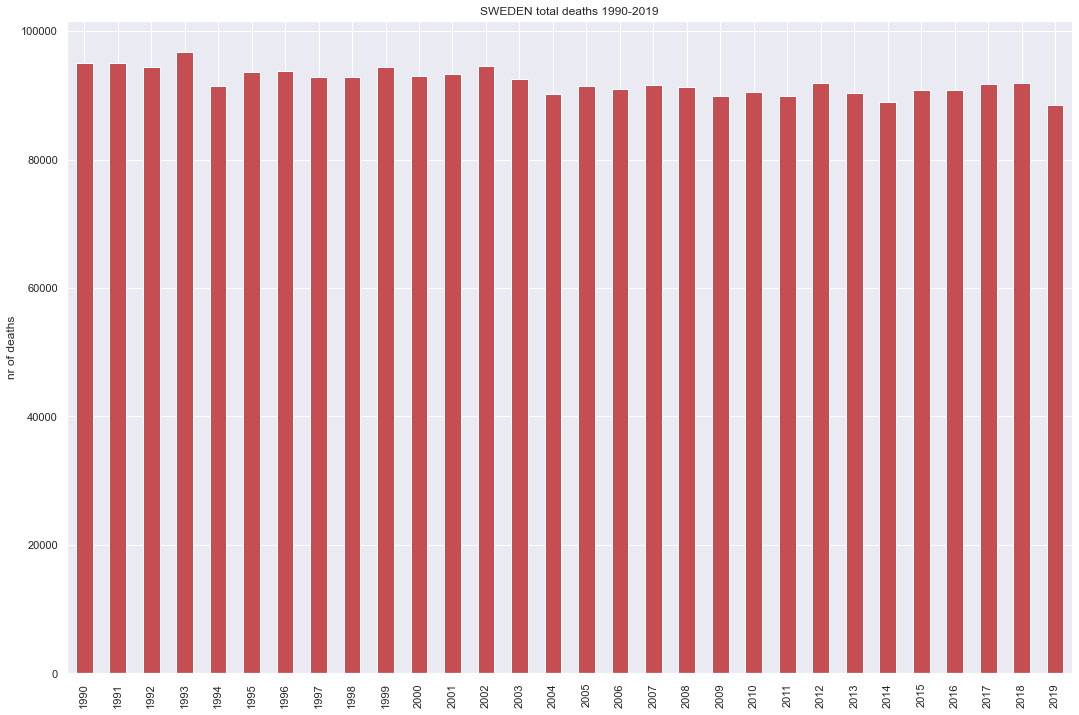

In [192]:
(death_df.iloc[:,:].sum()).plot(kind='bar',color='r',figsize=(18,12),
                               title='SWEDEN total deaths 1990-2019')
plt.ylabel('nr of deaths')
plt.savefig('total_number_of_deaths_1990_2019.jpg',format='jpg')

In [193]:
death_df[['2015','2016','2017','2018','2019']].sum().mean() - death_df.sum()['2019']

2261.600000000006

In [194]:
scb_pop = pd.read_csv('scb_population.csv',encoding='ISO-8859-1')

scb_pop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,8590630,8644119,8692013,8745109,8816381,8837496,8844499,8847625,8854322,8861426,...,9415570,9482855,9555893,9644864,9747355,9851017,9995153,10120242,10230185,10327589


In [195]:
pd.set_option("display.precision", 2)
deaths_per_m = death_df / (scb_pop.loc[0,:] / 1e6)
deaths_per_m = deaths_per_m.T
deaths_per_m

månad,January,February,March,April,May,June,July,August,September,October,November,December
1990,1017.50,879.91,980.25,928.45,922.63,863.85,895.86,872.93,857.56,883.17,917.05,1035.31
1991,1038.97,859.43,925.83,917.27,921.90,884.42,926.18,871.00,881.76,863.36,909.98,989.34
1992,1051.77,965.37,958.12,891.51,864.70,867.12,874.71,830.53,834.10,886.79,889.44,953.63
1993,1004.22,872.03,1040.35,899.47,858.88,831.09,857.62,830.98,835.67,862.08,902.45,1264.36
1994,1042.15,825.51,878.25,815.30,842.52,802.94,874.17,812.35,868.16,851.71,852.28,915.45
1995,941.90,835.64,914.97,921.53,881.47,830.67,842.55,822.18,829.99,850.58,872.19,1045.32
1996,1145.57,921.93,903.73,839.50,851.83,809.32,822.66,809.43,806.83,849.23,852.62,989.77
1997,1060.51,925.33,908.61,850.51,859.55,823.72,832.65,830.17,824.63,861.02,812.08,910.87
1998,912.44,887.70,974.55,901.71,838.01,791.25,833.60,830.89,788.54,862.52,886.12,985.96
1999,971.97,951.77,1023.54,845.46,849.64,782.15,833.95,847.15,812.51,858.21,860.36,1010.33


In [196]:
deaths_per_m.loc[:,'January' : 'July'].sum(axis=1)

1990    6488.46
1991    6474.00
1992    6473.30
1993    6363.67
1994    6080.84
1995    6168.72
1996    6294.53
1997    6260.89
1998    6139.26
1999    6258.47
2000    6255.69
2001    6178.16
2002    6177.31
2003    6075.87
2004    5853.92
2005    6094.77
2006    5845.11
2007    5897.47
2008    5826.38
2009    5756.00
2010    5612.41
2011    5564.04
2012    5723.17
2013    5615.11
2014    5334.37
2015    5529.48
2016    5330.18
2017    5389.00
2018    5421.02
2019    5010.66
dtype: float64

In [197]:
monthly_deaths = []

for r,v in deaths_per_m.iterrows():
    monthly_deaths.extend(v)
    


In [198]:
dates = pd.date_range('1990-01-01','2019-12-31',freq='M')
dates

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=360, freq='M')

In [199]:
monthly_timeline = pd.DataFrame(data=monthly_deaths,index=dates,columns=['dead_per_million'])
scb_1990_2019 = monthly_timeline.copy()

In [200]:
scb_1990_2019.loc['2019-01-01' : '2019-07-31'].sum()

dead_per_million    5010.66
dtype: float64

In [201]:
scb_pop.mean()['2015':'2019'].mean()

10104837.2

In [202]:
scb_2020 = parse_scb_prel()
scb_2020

,2015,2016,2017,2018,2019,2020,2015-2019,Månad
2020-01-01,298.06,250.37,347.27,282.45,309.09,260.63,297.59,januari
2020-01-02,274.82,277.96,324.73,320.46,284.36,307.83,296.56,januari
2020-01-03,283.91,299.42,317.56,303.00,279.21,262.68,296.56,januari
2020-01-04,258.65,265.70,312.44,292.73,290.54,279.10,284.29,januari
2020-01-05,270.78,265.70,311.42,298.89,283.33,271.92,286.34,januari
...,...,...,...,...,...,...,...,...
2020-08-03,217.23,209.49,201.81,247.53,228.72,175.46,220.89,augusti
2020-08-04,226.32,250.37,210.00,258.83,200.91,143.65,229.07,augusti
2020-08-05,231.37,231.98,226.39,225.96,222.54,73.88,228.05,augusti
2020-08-06,217.23,218.69,221.27,205.42,238.00,33.86,219.87,augusti


In [203]:
last_date = scb_2020.index[-1].date()
last_date

datetime.date(2020, 8, 7)

In [204]:
##### needs update when month changes #####

scb_2020 = scb_2020.groupby('Månad').sum()
scb_2020['min_2015_2019'] = scb_2020[['2015','2016','2017','2018','2019']].min(axis=1)
scb_2020['max_2015_2019'] = scb_2020[['2015','2016','2017','2018','2019']].max(axis=1)

scb_2020 = scb_2020[['2020','2015-2019','min_2015_2019','max_2015_2019']]
scb_2020_orig = scb_2020.copy()

####
# dividing all years 2015-2020 by 2020 population for consistency with scb_poisson
####

'''
scb_2020[['2015-2019','min_2015_2019',
          'max_2015_2019']] = scb_2020[['2015-2019','min_2015_2019',
            'max_2015_2019']] / (scb_pop.mean()['2015':'2019'].mean()/1e6)
'''

scb_2020[['2015-2019','min_2015_2019',
          'max_2015_2019']] = scb_2020[['2015-2019','min_2015_2019',
            'max_2015_2019']] / (curr_pop/1e6)

scb_2020 = pd.DataFrame(scb_2020)
scb_2020.reset_index(inplace=True)

# fix monthly
scb_2020['Månad'] = pd.Categorical(scb_2020['Månad'],['januari','februari','mars','april','maj','juni',
                                                      'juli','augusti'])
scb_2020.sort_values('Månad',inplace=True)

# fix monthly
scb_2020.index = pd.date_range('2020-01-01','2020-08-31',freq='M')

#scb_2020 = scb_2020.loc[:last_complete_month]
scb_2020['2020'] = scb_2020['2020'] / (curr_pop/1e6)
scb_2020.rename(columns={'2020' : 'dead_per_million'},inplace=True)
scb_2020

,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,januari,806.76,852.66,815.45,902.73
2020-02-29,februari,731.45,792.85,727.66,810.64
2020-03-31,mars,831.01,821.46,755.19,915.96
2020-04-30,april,1030.01,742.05,716.88,757.33
2020-05-31,maj,864.39,700.56,674.09,727.26
2020-06-30,juni,716.95,651.94,643.66,662.03
2020-07-31,juli,664.78,690.46,670.69,721.93
2020-08-31,augusti,80.48,155.16,148.41,162.80


In [205]:
scb_2020['dead_per_million'].cumsum() - scb_2020['2015-2019'].cumsum()

2020-01-31    -45.89
2020-02-29   -107.29
2020-03-31    -97.75
2020-04-30    190.21
2020-05-31    354.04
2020-06-30    419.04
2020-07-31    393.36
2020-08-31    318.68
Freq: M, dtype: float64

In [206]:
monthly_timeline

,dead_per_million
1990-01-31,1017.50
1990-02-28,879.91
1990-03-31,980.25
1990-04-30,928.45
1990-05-31,922.63
...,...
2019-08-31,680.80
2019-09-30,663.76
2019-10-31,729.70
2019-11-30,720.21


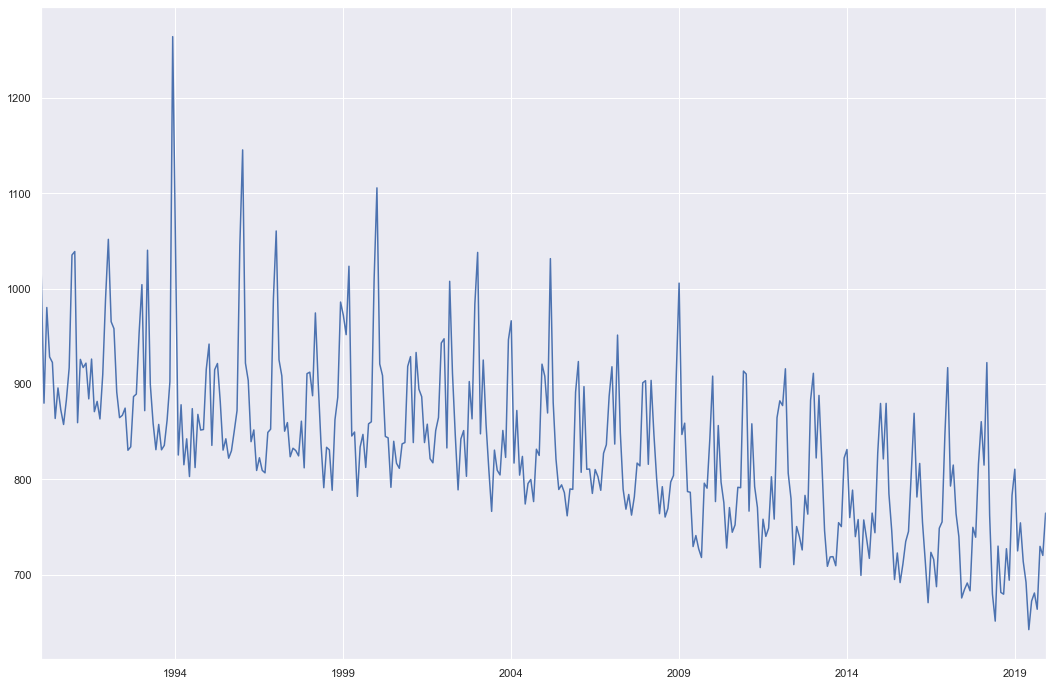

In [207]:
monthly_timeline.loc[:'2019-12-31','dead_per_million'].plot(figsize=(18,12))
plt.plot(scb_2020.loc[:last_complete_month,'dead_per_million'],color='r')

In [208]:
scb_2020

,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,januari,806.76,852.66,815.45,902.73
2020-02-29,februari,731.45,792.85,727.66,810.64
2020-03-31,mars,831.01,821.46,755.19,915.96
2020-04-30,april,1030.01,742.05,716.88,757.33
2020-05-31,maj,864.39,700.56,674.09,727.26
2020-06-30,juni,716.95,651.94,643.66,662.03
2020-07-31,juli,664.78,690.46,670.69,721.93
2020-08-31,augusti,80.48,155.16,148.41,162.80


In [209]:
monthly_timeline = pd.concat([monthly_timeline['dead_per_million'],scb_2020['dead_per_million']],axis=0)
monthly_timeline

1990-01-31    1017.50
1990-02-28     879.91
1990-03-31     980.25
1990-04-30     928.45
1990-05-31     922.63
               ...   
2020-04-30    1030.01
2020-05-31     864.39
2020-06-30     716.95
2020-07-31     664.78
2020-08-31      80.48
Name: dead_per_million, Length: 368, dtype: float64

In [210]:
yearly_monthly_sums = monthly_timeline.groupby(
    [monthly_timeline.index.year,monthly_timeline.index.month]).sum()

deaths_per_m_grouped_sums_1990_2020_YTD = yearly_monthly_sums.unstack().reset_index().set_index('index')
cols = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
deaths_per_m_grouped_sums_1990_2020_YTD.columns = cols
deaths_per_m_grouped_sums_1990_2020_YTD.index.name='year'
deaths_per_m_grouped_sums_1990_2020_YTD 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1990,1017.50,879.91,980.25,928.45,922.63,863.85,895.86,872.93,857.56,883.17,917.05,1035.31
1991,1038.97,859.43,925.83,917.27,921.90,884.42,926.18,871.00,881.76,863.36,909.98,989.34
1992,1051.77,965.37,958.12,891.51,864.70,867.12,874.71,830.53,834.10,886.79,889.44,953.63
1993,1004.22,872.03,1040.35,899.47,858.88,831.09,857.62,830.98,835.67,862.08,902.45,1264.36
1994,1042.15,825.51,878.25,815.30,842.52,802.94,874.17,812.35,868.16,851.71,852.28,915.45
1995,941.90,835.64,914.97,921.53,881.47,830.67,842.55,822.18,829.99,850.58,872.19,1045.32
1996,1145.57,921.93,903.73,839.50,851.83,809.32,822.66,809.43,806.83,849.23,852.62,989.77
1997,1060.51,925.33,908.61,850.51,859.55,823.72,832.65,830.17,824.63,861.02,812.08,910.87
1998,912.44,887.70,974.55,901.71,838.01,791.25,833.60,830.89,788.54,862.52,886.12,985.96


In [211]:
deaths_per_m_grouped_sums_1990_2020_YTD.loc[:,'Jan':'Jul'].sum(axis=1)

year
1990    6488.46
1991    6474.00
1992    6473.30
1993    6363.67
1994    6080.84
1995    6168.72
1996    6294.53
1997    6260.89
1998    6139.26
1999    6258.47
2000    6255.69
2001    6178.16
2002    6177.31
2003    6075.87
2004    5853.92
2005    6094.77
2006    5845.11
2007    5897.47
2008    5826.38
2009    5756.00
2010    5612.41
2011    5564.04
2012    5723.17
2013    5615.11
2014    5334.37
2015    5529.48
2016    5330.18
2017    5389.00
2018    5421.02
2019    5010.66
2020    5645.35
dtype: float64

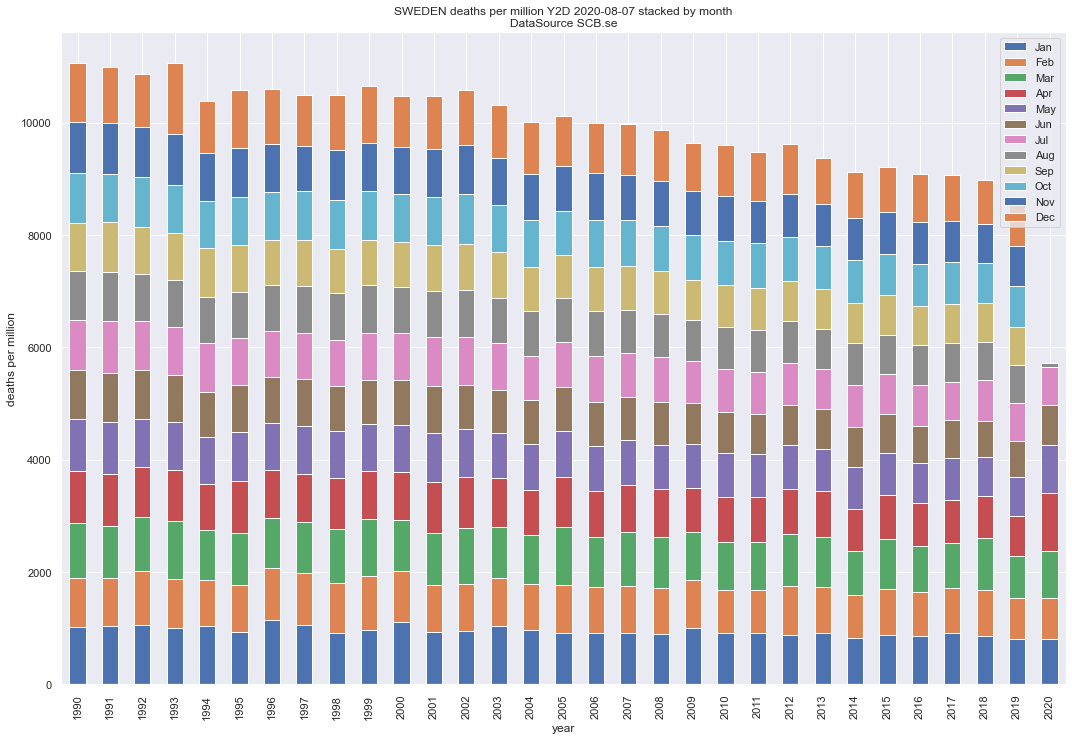

In [212]:
title = 'SWEDEN deaths per million Y2D {} stacked by month\nDataSource SCB.se'.format(last_date)

deaths_per_m_grouped_sums_1990_2020_YTD.plot(kind='bar',title=title,
                                             stacked=True,figsize=(18,12))
plt.ylabel('deaths per million')
plt.savefig('scb_1990_2020_deaths_per_M_stacked.jpg',format='jpg')

Text(0, 0.5, 'rank')

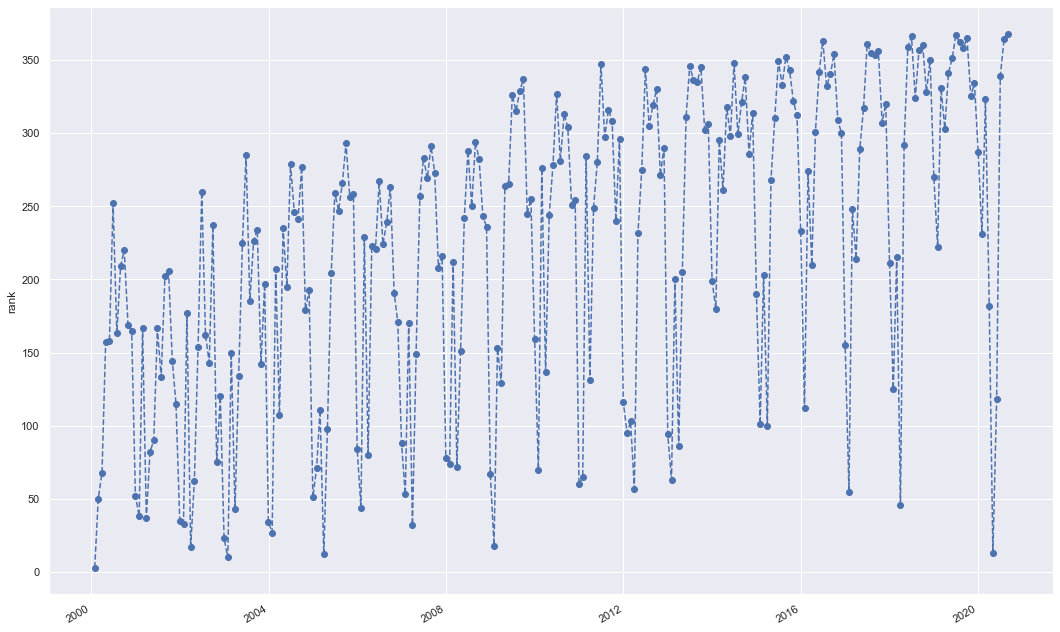

In [213]:
two_thousands_rank = monthly_timeline.rank(ascending=False).sort_values()
two_thousands_rank = two_thousands_rank.loc['2000-01-01':]
two_thousands_rank.plot(figsize=(18,12),style=['o--'])
plt.ylabel('rank')

In [214]:
monthly_timeline = pd.DataFrame(monthly_timeline.sort_values(ascending=False))
monthly_timeline['rank'] = range(1,len(monthly_timeline) + 1)
monthly_timeline.head(50)

,dead_per_million,rank
1993-12-31,1264.36,1
1996-01-31,1145.57,2
2000-01-31,1105.73,3
1997-01-31,1060.51,4
1992-01-31,1051.77,5
1995-12-31,1045.32,6
1994-01-31,1042.15,7
1993-03-31,1040.35,8
1991-01-31,1038.97,9
2003-01-31,1038.03,10


In [215]:
monthly_timeline.loc['2020-07-31']

,dead_per_million,rank
2020-07-31,664.78,364


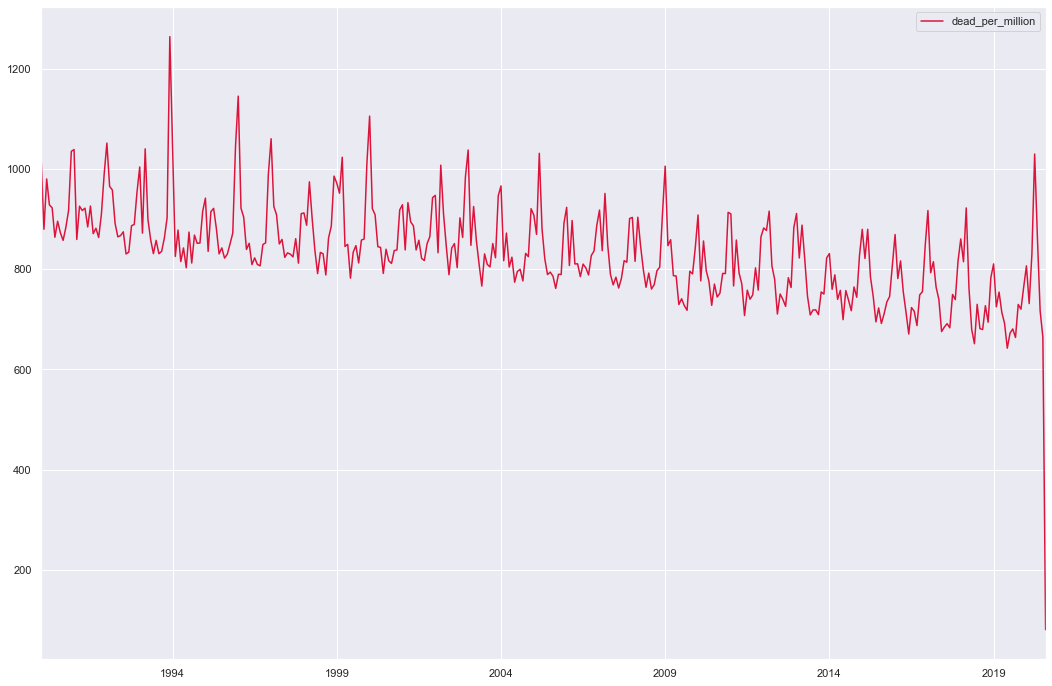

In [216]:
monthly_timeline.sort_index().plot(y='dead_per_million',figsize=(18,12),color=['crimson'])

In [217]:
mean = monthly_timeline.mean()
mean

dead_per_million    832.79
rank                184.50
dtype: float64

In [218]:
monthly_timeline.loc[last_complete_month]

,dead_per_million,rank
2020-07-31,664.78,364


In [219]:
top_20 = pd.DataFrame(monthly_timeline[:20])
top_20

,dead_per_million,rank
1993-12-31,1264.36,1
1996-01-31,1145.57,2
2000-01-31,1105.73,3
1997-01-31,1060.51,4
1992-01-31,1051.77,5
1995-12-31,1045.32,6
1994-01-31,1042.15,7
1993-03-31,1040.35,8
1991-01-31,1038.97,9
2003-01-31,1038.03,10


['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b']


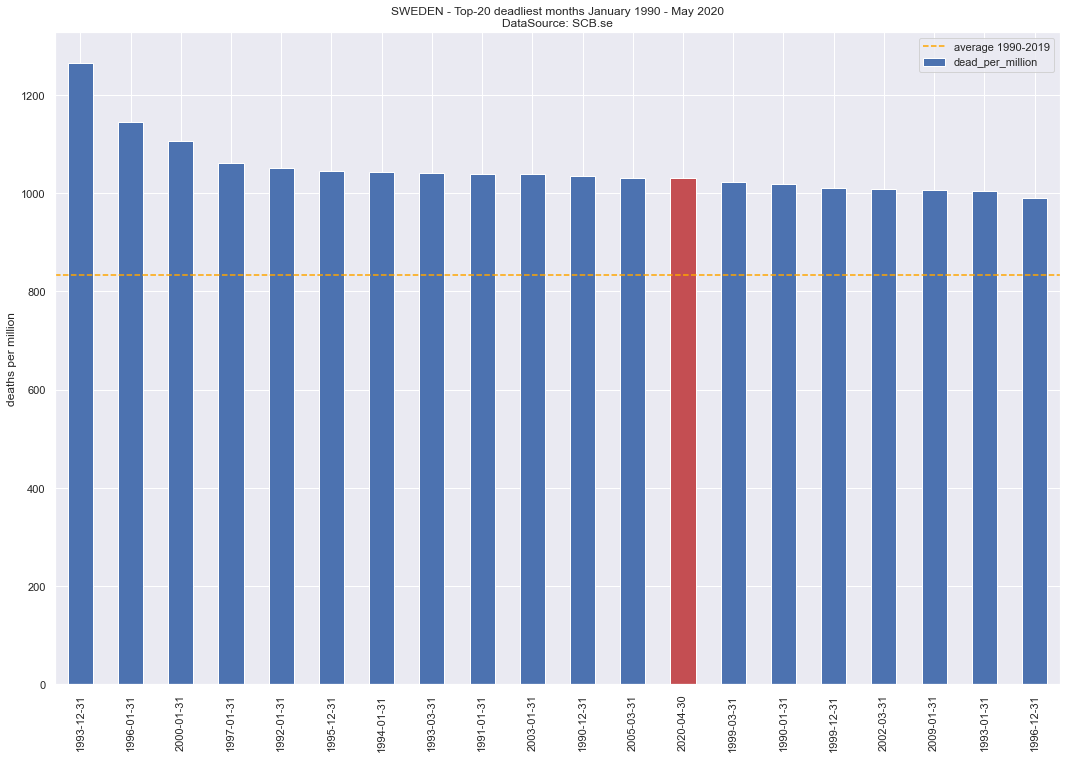

In [220]:
colors = ['b'] * 12 # must set colors after seeing which place they fall onto
colors.append('r')
colors.append('b')
print (colors)
top_20.index = top_20.index.date
top_20['dead_per_million'].plot(kind='bar',
                                figsize=(18,12),
                                color=colors,
                                title='SWEDEN - Top-20 deadliest months January 1990 - May 2020\nDataSource: SCB.se')
plt.ylabel('deaths per million')
plt.axhline(mean['dead_per_million'],color='orange',ls='dashed',label='average 1990-2019')
plt.legend(loc='upper right')
plt.savefig('scb_population_deaths_1990-2020.jpg',format='jpg')

In [221]:

scb_1990_2019

,dead_per_million
1990-01-31,1017.50
1990-02-28,879.91
1990-03-31,980.25
1990-04-30,928.45
1990-05-31,922.63
...,...
2019-08-31,680.80
2019-09-30,663.76
2019-10-31,729.70
2019-11-30,720.21


In [222]:
scb_1990_2020 = pd.DataFrame(pd.concat([scb_1990_2019['dead_per_million'],scb_2020['dead_per_million']],axis=0))
scb_1990_2020

,dead_per_million
1990-01-31,1017.50
1990-02-28,879.91
1990-03-31,980.25
1990-04-30,928.45
1990-05-31,922.63
...,...
2020-04-30,1030.01
2020-05-31,864.39
2020-06-30,716.95
2020-07-31,664.78


In [223]:
scb_1990_2020['year'] = scb_1990_2020.index.year
scb_1990_2020['month'] = scb_1990_2020.index.month

In [224]:
scb_1990_2020.tail(20)

,dead_per_million,year,month
2019-01-31,810.64,2019,1
2019-02-28,724.95,2019,2
2019-03-31,754.39,2019,3
2019-04-30,713.91,2019,4
2019-05-31,692.03,2019,5
2019-06-30,642.36,2019,6
2019-07-31,672.37,2019,7
2019-08-31,680.80,2019,8
2019-09-30,663.76,2019,9
2019-10-31,729.70,2019,10


In [225]:
month_grp = scb_1990_2020[:'2019-12-31'].groupby('month')['dead_per_million'].agg(['min','mean','max'])
print (month_grp.head(12))
scb_2020


          min    mean      max
month                         
1      810.64  953.78  1145.57
2      724.95  843.25   965.37
3      754.39  909.80  1040.35
4      713.91  834.45   928.45
5      679.66  810.38   922.63
6      642.36  765.73   884.42
7      672.37  799.03   926.18
8      680.80  781.28   872.93
9      663.76  775.03   881.76
10     727.26  817.24   902.61
11     694.22  815.54   917.05
12     764.55  919.14  1264.36


,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019
2020-01-31,januari,806.76,852.66,815.45,902.73
2020-02-29,februari,731.45,792.85,727.66,810.64
2020-03-31,mars,831.01,821.46,755.19,915.96
2020-04-30,april,1030.01,742.05,716.88,757.33
2020-05-31,maj,864.39,700.56,674.09,727.26
2020-06-30,juni,716.95,651.94,643.66,662.03
2020-07-31,juli,664.78,690.46,670.69,721.93
2020-08-31,augusti,80.48,155.16,148.41,162.80


In [226]:
scb_2020['excess'] = scb_2020['dead_per_million'] - scb_2020['2015-2019']
scb_2020

,Månad,dead_per_million,2015-2019,min_2015_2019,max_2015_2019,excess
2020-01-31,januari,806.76,852.66,815.45,902.73,-45.89
2020-02-29,februari,731.45,792.85,727.66,810.64,-61.40
2020-03-31,mars,831.01,821.46,755.19,915.96,9.54
2020-04-30,april,1030.01,742.05,716.88,757.33,287.96
2020-05-31,maj,864.39,700.56,674.09,727.26,163.83
2020-06-30,juni,716.95,651.94,643.66,662.03,65.00
2020-07-31,juli,664.78,690.46,670.69,721.93,-25.68
2020-08-31,augusti,80.48,155.16,148.41,162.80,-74.69


In [227]:
excess = scb_2020.set_index(scb_2020.index.month).join(month_grp['mean'])
excess.drop(['min_2015_2019','max_2015_2019'],axis=1,inplace=True)


,Månad,dead_per_million,2015-2019,excess,1990-2019_mean,excess_1990_baseline,excess_2015_baseline,cumulative_excess_vs_1990-2019,cumulative_excess_vs_2015-2019,date
1,januari,806.76,852.66,-45.89,953.78,-147.02,-45.89,-147.02,-45.89,2020-01-31
2,februari,731.45,792.85,-61.40,843.25,-111.80,-61.40,-258.82,-107.29,2020-02-29
3,mars,831.01,821.46,9.54,909.80,-78.79,9.54,-337.61,-97.75,2020-03-31
4,april,1030.01,742.05,287.96,834.45,195.56,287.96,-142.05,190.21,2020-04-30
5,maj,864.39,700.56,163.83,810.38,54.01,163.83,-88.03,354.04,2020-05-31
6,juni,716.95,651.94,65.00,765.73,-48.78,65.00,-136.82,419.04,2020-06-30
7,juli,664.78,690.46,-25.68,799.03,-134.24,-25.68,-271.06,393.36,2020-07-31
8,augusti,80.48,155.16,-74.69,781.28,-700.80,-74.69,-971.86,318.68,2020-08-31


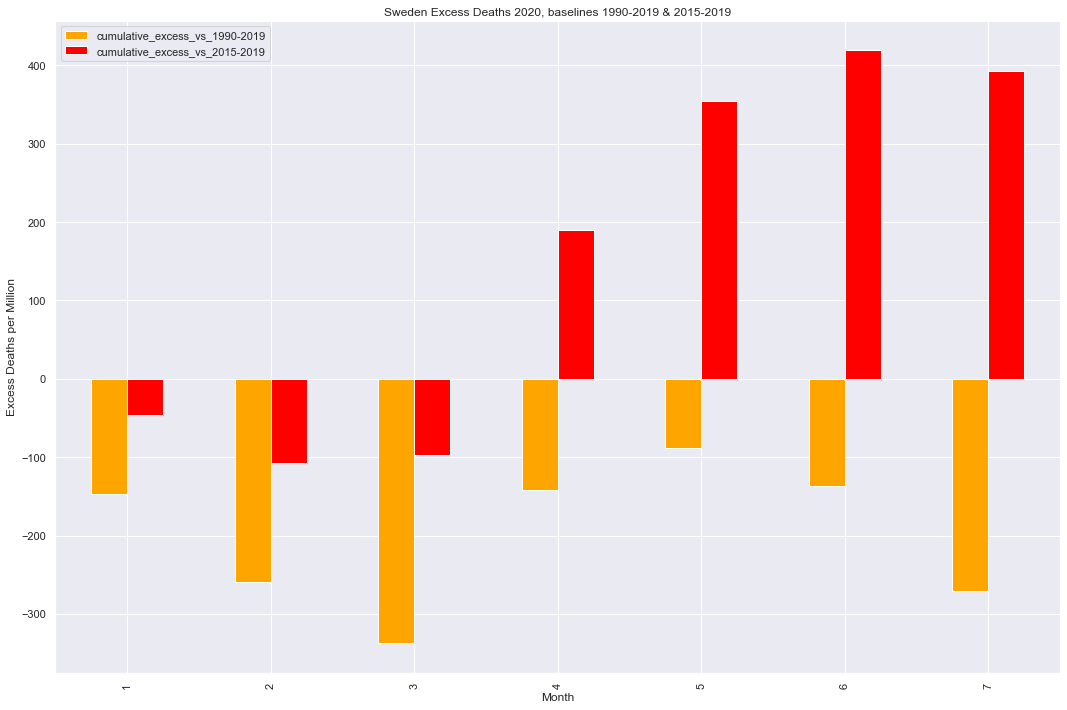

In [228]:
excess.rename(columns={'mean' : '1990-2019_mean'}, inplace=True)
excess['excess_1990_baseline'] = excess['dead_per_million'] - excess['1990-2019_mean']
excess['excess_2015_baseline'] = excess['dead_per_million'] - excess['2015-2019']
excess['cumulative_excess_vs_1990-2019'] = excess['excess_1990_baseline'].cumsum()
excess['cumulative_excess_vs_2015-2019'] = excess['excess_2015_baseline'].cumsum()

# fix monthly
excess['date'] = pd.date_range('2020-01-01','2020-08-31',freq='M')

excess[:pd.Timestamp(last_complete_month).date().month].plot(kind='bar',figsize=(18,12),
                                                             title=('Sweden Excess Deaths 2020, baselines 1990-2019 & 2015-2019'),
                                                             y=['cumulative_excess_vs_1990-2019',
                                                               'cumulative_excess_vs_2015-2019'],color=['orange','red'])
plt.ylabel('Excess Deaths per Million')
plt.xlabel('Month')
excess

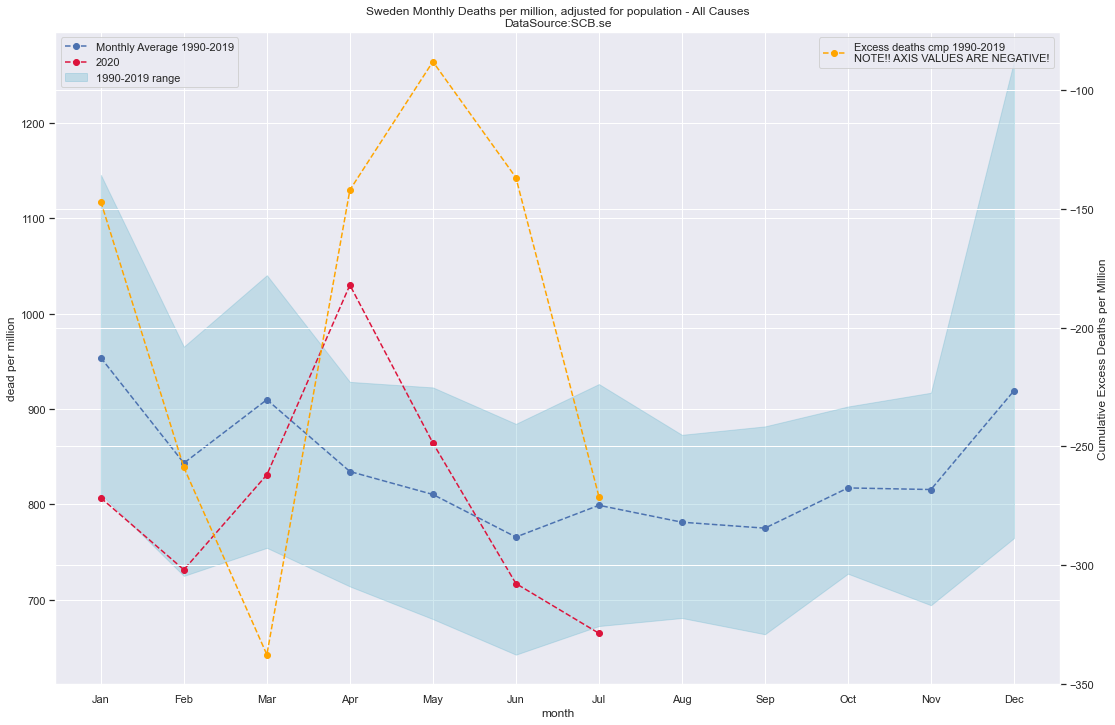

In [229]:
scb_2020['month'] = scb_2020.index.month 

plt.figure(figsize=(18,12))
plt.title('Sweden Monthly Deaths per million, adjusted for population - All Causes\nDataSource:SCB.se')
ax = plt.gca()
ax2 = plt.twinx()

ax.plot(month_grp['mean'],'o--',label='Monthly Average 1990-2019')
#ax.plot(scb_2020['month'],scb_2020['2015-2019'],'o--',color='k',label='Monthly Average 2015-2019')
#plt.fill_between(scb_2020['month'],scb_2020['min_2015_2019'],scb_2020['max_2015_2019'],color='m',alpha=0.3,label='2015-2019 range')

ax.fill_between(month_grp.index,month_grp['min'],month_grp['max'],color='c',alpha=0.3,label='1990-2019 range')

ax.plot(scb_2020['month'][:last_complete_month],scb_2020['dead_per_million'][:last_complete_month],'o--',color='crimson',label='2020')
ax.legend(loc='upper left')
ax.set_xlabel('month')
ax.set_ylabel('dead per million')

#ax2.plot(excess['cum_vs_2015'][:pd.Timestamp(last_complete_month).month],'o--',
         #color='orange',label='Excess deaths cmp 2015-2019')

ax2.plot(excess['cumulative_excess_vs_1990-2019'][:pd.Timestamp(last_complete_month).month],'o--',
         color='orange',label='Excess deaths cmp 1990-2019\nNOTE!! AXIS VALUES ARE NEGATIVE!')

ax2.set_ylabel('Cumulative Excess Deaths per Million')
#ax2.set_ylim([-400,10])
ax2.legend(loc='upper right')

xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
_=plt.xticks(month_grp.index,xticks)
plt.savefig('scb_monthly_deaths_all_cmp_1990_2019.jpg',format='jpg')

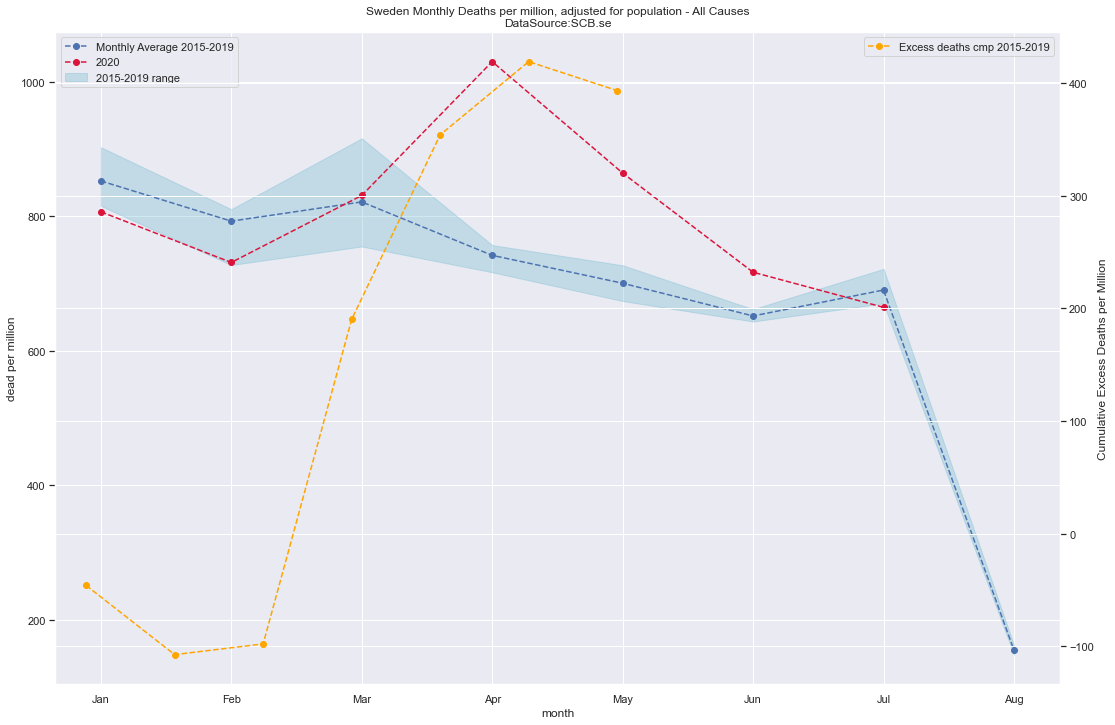

In [230]:
plt.figure(figsize=(18,12))
plt.title('Sweden Monthly Deaths per million, adjusted for population - All Causes\nDataSource:SCB.se')
ax = plt.gca()
ax2 = plt.twinx()

#ax.plot(month_grp['mean'],'o--',label='Monthly Average 1990-2019')
ax.plot(scb_2020['month'],scb_2020['2015-2019'],'o--',color='b',label='Monthly Average 2015-2019')
ax.fill_between(scb_2020['month'],scb_2020['min_2015_2019'],scb_2020['max_2015_2019'],color='c',alpha=0.3,label='2015-2019 range')

#ax.fill_between(month_grp.index,month_grp['min'],month_grp['max'],color='c',alpha=0.3,label='1990-2019 range')

ax.plot(scb_2020['month'][:last_complete_month],scb_2020['dead_per_million'][:last_complete_month],'o--',color='crimson',label='2020')
ax.legend(loc='upper left')
ax.set_xlabel('month')
ax.set_ylabel('dead per million')

#ax2.plot(excess['cum_vs_2015'][:pd.Timestamp(last_complete_month).month],'o--',
         #color='orange',label='Excess deaths cmp 2015-2019')

ax2.plot(excess['cumulative_excess_vs_2015-2019'][:pd.Timestamp(last_complete_month).month],'o--',
         color='orange',label='Excess deaths cmp 2015-2019')

ax2.set_ylabel('Cumulative Excess Deaths per Million')
ax2.legend(loc='upper right')

xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
_=plt.xticks(month_grp.index,xticks)
plt.savefig('scb_monthly_deaths_all_cmp_2015-2019.jpg',format='jpg')

In [231]:
scb_2020_monthly = scb_2020.set_index('month')
print (scb_2020_monthly)

mean_1990_2019 = month_grp.loc[:pd.Timestamp(last_complete_month).month]
print (mean_1990_2019)
monthly_excess = scb_2020_monthly['dead_per_million'] - mean_1990_2019['mean']
print (monthly_excess)
print (monthly_excess.cumsum())

          Månad  dead_per_million  2015-2019  min_2015_2019  max_2015_2019  \
month                                                                        
1       januari            806.76     852.66         815.45         902.73   
2      februari            731.45     792.85         727.66         810.64   
3          mars            831.01     821.46         755.19         915.96   
4         april           1030.01     742.05         716.88         757.33   
5           maj            864.39     700.56         674.09         727.26   
6          juni            716.95     651.94         643.66         662.03   
7          juli            664.78     690.46         670.69         721.93   
8       augusti             80.48     155.16         148.41         162.80   

       excess  
month          
1      -45.89  
2      -61.40  
3        9.54  
4      287.96  
5      163.83  
6       65.00  
7      -25.68  
8      -74.69  
          min    mean      max
month                       

In [232]:
pd.Timestamp(last_complete_month).month

7

In [233]:
mask = scb_1990_2020.index.month.isin(range(1,pd.Timestamp(last_complete_month).month + 1))
first_months = scb_1990_2020[mask]['dead_per_million']
first_cum = first_months.groupby(first_months.index.year).sum()
first_cum

1990    6488.46
1991    6474.00
1992    6473.30
1993    6363.67
1994    6080.84
1995    6168.72
1996    6294.53
1997    6260.89
1998    6139.26
1999    6258.47
2000    6255.69
2001    6178.16
2002    6177.31
2003    6075.87
2004    5853.92
2005    6094.77
2006    5845.11
2007    5897.47
2008    5826.38
2009    5756.00
2010    5612.41
2011    5564.04
2012    5723.17
2013    5615.11
2014    5334.37
2015    5529.48
2016    5330.18
2017    5389.00
2018    5421.02
2019    5010.66
2020    5645.35
Name: dead_per_million, dtype: float64

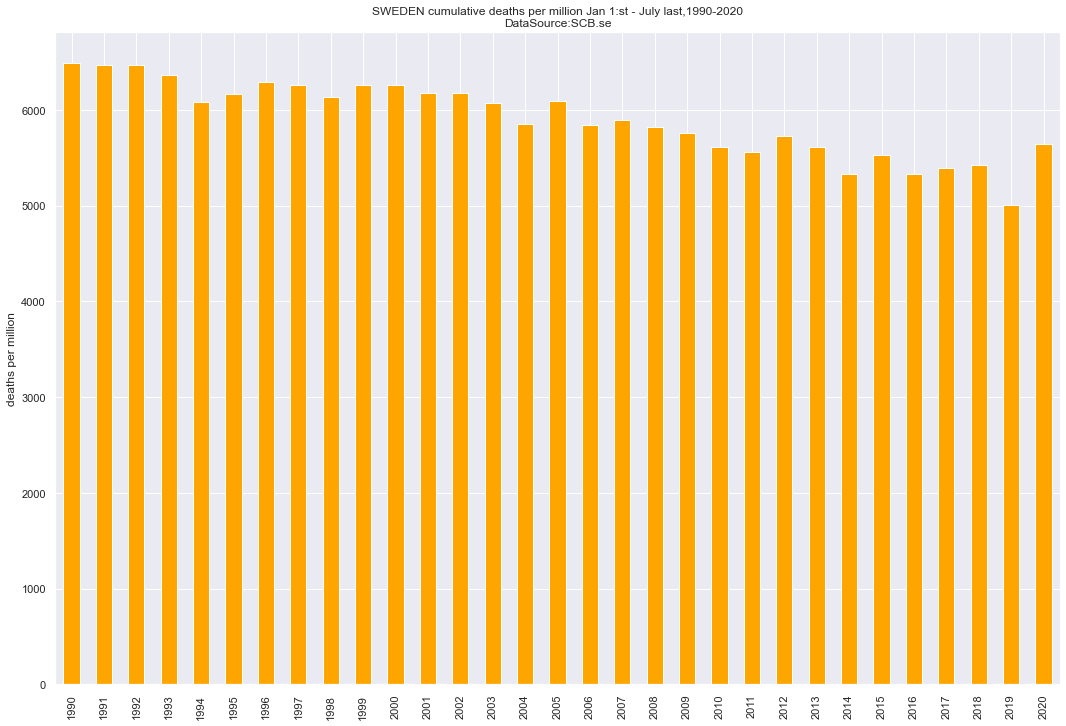

In [234]:
first_cum.plot(kind='bar',figsize=(18,12),color='orange',
               title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()))
plt.ylabel('deaths per million')
plt.savefig('scb_deaths_jan_may_unsorted.jpg'.format('jpg'))

['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'crimson', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


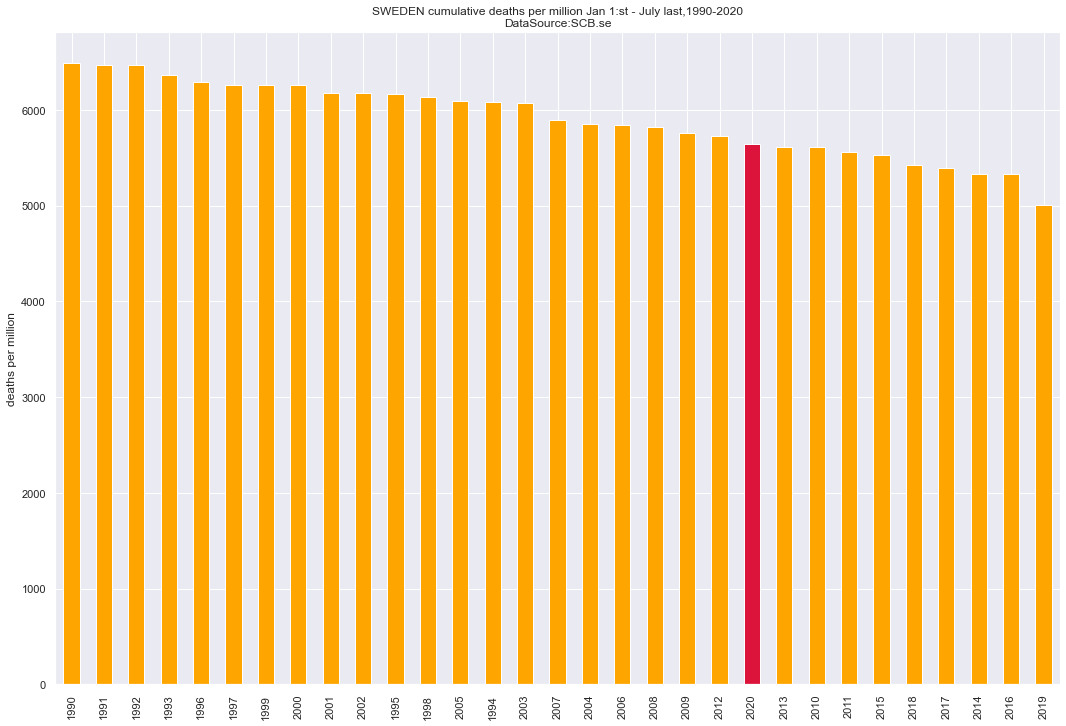

In [235]:
colors = ['orange'] * 21
colors.append('crimson')
color_tail = ['orange'] * 9
colors.extend(color_tail)

print (colors)
first_cum.sort_values(ascending=False).plot(kind='bar',figsize=(18,12),
                                            title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()),
                                            color=colors)
plt.ylabel('deaths per million')
plt.savefig('scb_deaths_jan_july_sorted.jpg',format='jpg')

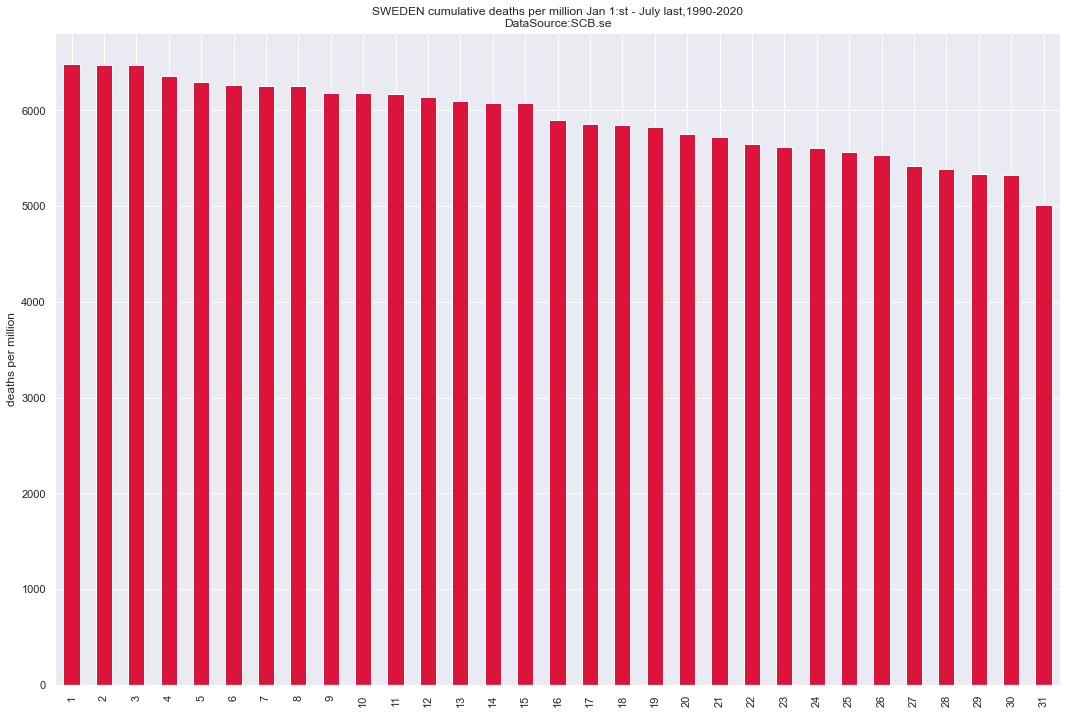

In [236]:
first_cum.sort_values(ascending=False).plot(kind='bar',figsize=(18,12),
                                            title='SWEDEN cumulative deaths per million Jan 1:st - {} last,1990-2020\nDataSource:SCB.se'.format(
                   pd.Timestamp(last_complete_month).month_name()),
                                            color='crimson')
plt.ylabel('deaths per million')
plt.xticks(range(len(first_cum)),range(1,len(first_cum) + 1))
plt.savefig('scb_deaths_jan_july_sorted_random.jpg',format='jpg')

In [237]:
by_month = first_months.groupby(first_months.index.month)
month_stats =[]

for month in range (1,pd.Timestamp(last_complete_month).month + 1):
    m = by_month.get_group(month)
    month_stats.append(m.agg(['min','mean','max']).values)
    
month_stats = pd.DataFrame(data=np.array(month_stats),
                           index=range(1,pd.Timestamp(last_complete_month).month + 1),
                           columns=['mini','mean','maxi'])

month_stats.index.name='month'
month_stats

,mini,mean,maxi
month,,,
1,806.76,949.04,1145.57
2,724.95,839.64,965.37
3,754.39,907.25,1040.35
4,713.91,840.76,1030.01
5,679.66,812.12,922.63
6,642.36,764.16,884.42
7,664.78,794.70,926.18


Text(0, 0.5, 'cumulative deaths per million')

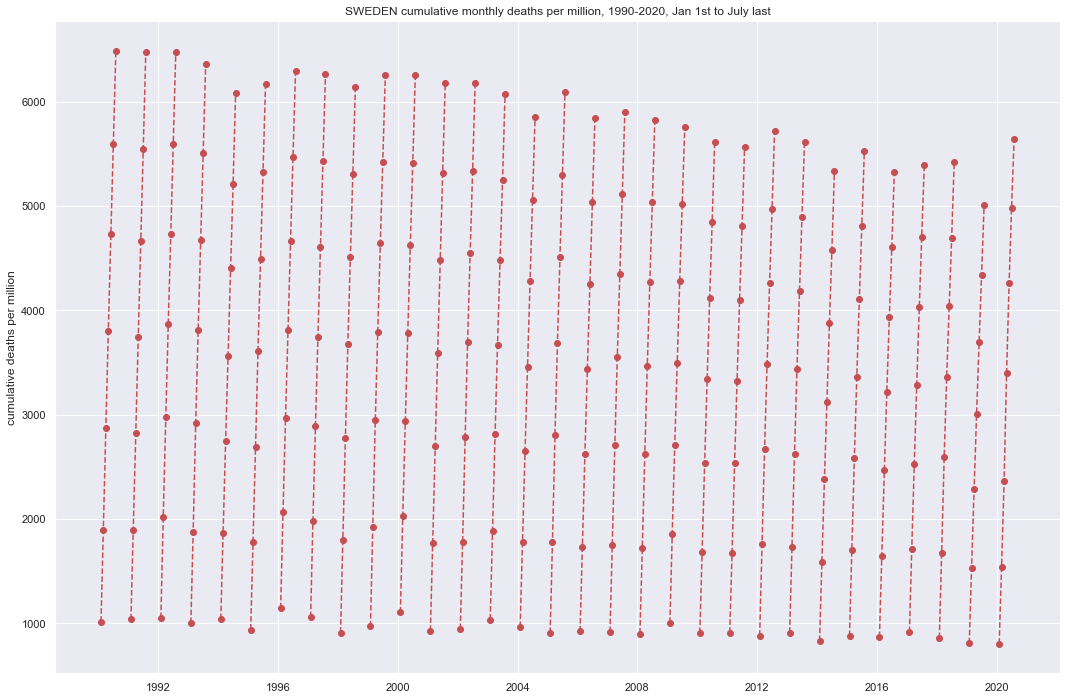

In [238]:
from matplotlib import cm

first_cumsum = first_months.groupby(first_months.index.year).cumsum()
bar = first_cumsum.groupby(first_cumsum.index.year)

plt.figure(figsize=(18,12))
plt.title('SWEDEN cumulative monthly deaths per million, 1990-2020, Jan 1st to {} last'.format(
    pd.Timestamp(last_complete_month).month_name()))

for k in bar.groups.keys():
    plt.plot(bar.get_group(k),'ro--')
    
plt.ylabel('cumulative deaths per million')

In [239]:
first_months

1990-01-31    1017.50
1990-02-28     879.91
1990-03-31     980.25
1990-04-30     928.45
1990-05-31     922.63
               ...   
2020-03-31     831.01
2020-04-30    1030.01
2020-05-31     864.39
2020-06-30     716.95
2020-07-31     664.78
Name: dead_per_million, Length: 217, dtype: float64

In [240]:
first_sum = first_months.groupby(first_months.index.year)

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
              7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

years = dict()

for k in first_sum.groups.keys():
    years[k] = first_sum.get_group(k).values
    
years = pd.DataFrame(years).T
num_months = range(1,pd.Timestamp(last_complete_month).month + 1)
years.columns= num_months

years.rename(columns=month_names,inplace=True)

years.columns.name = 'month'
years.index.name = 'year'
years_per_M = years



In [241]:
years_1990_2019_mean = years.loc[1990:2019].mean().sum()
years_2015_2019_mean = years.loc[2015:2019].mean().sum()
print (years_1990_2019_mean)
print (years_2015_2019_mean)
years

5916.408967018934
5336.067540048751


month,Jan,Feb,Mar,Apr,May,Jun,Jul
year,,,,,,,
1990,1017.50,879.91,980.25,928.45,922.63,863.85,895.86
1991,1038.97,859.43,925.83,917.27,921.90,884.42,926.18
1992,1051.77,965.37,958.12,891.51,864.70,867.12,874.71
1993,1004.22,872.03,1040.35,899.47,858.88,831.09,857.62
1994,1042.15,825.51,878.25,815.30,842.52,802.94,874.17
1995,941.90,835.64,914.97,921.53,881.47,830.67,842.55
1996,1145.57,921.93,903.73,839.50,851.83,809.32,822.66
1997,1060.51,925.33,908.61,850.51,859.55,823.72,832.65
1998,912.44,887.70,974.55,901.71,838.01,791.25,833.60


In [242]:
years.to_csv('death_per_M_1990_2020_Jan_Jul.csv')

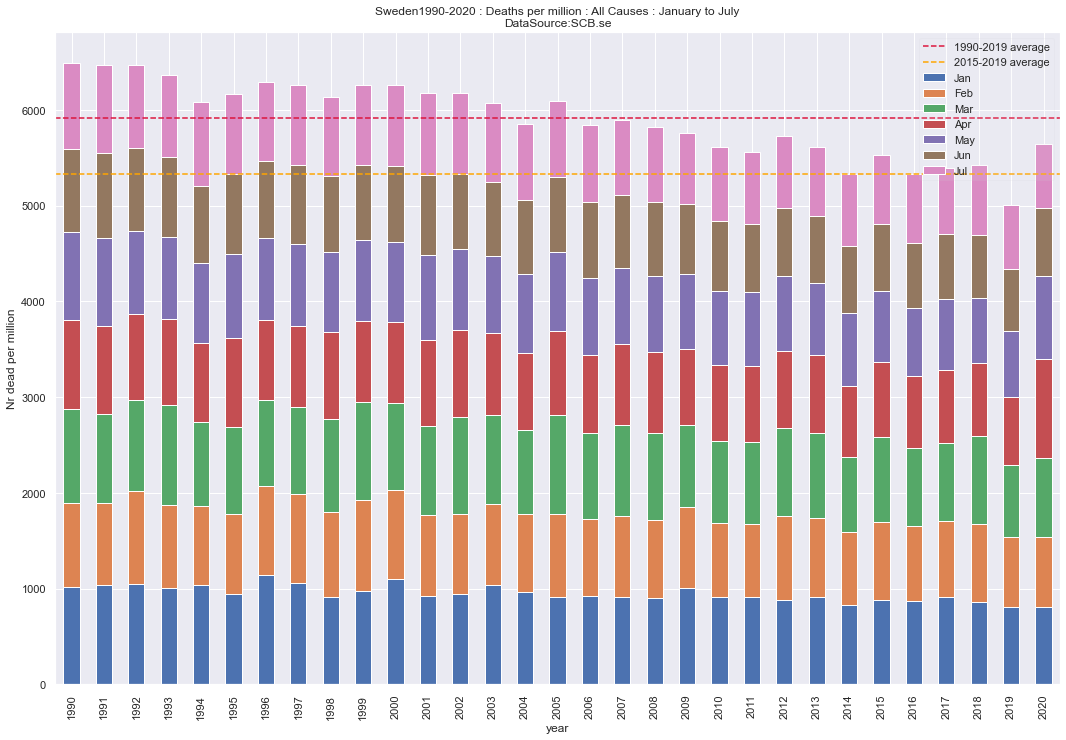

In [243]:


years.plot(kind='bar',stacked=True,figsize=(18,12),
          title='Sweden1990-2020 : Deaths per million : All Causes : January to {}\nDataSource:SCB.se'.format(
              pd.Timestamp(last_complete_month).month_name()))

plt.axhline(years_1990_2019_mean,ls='dashed',color='crimson',label='1990-2019 average')
plt.axhline(years_2015_2019_mean,ls='dashed',color='orange',label='2015-2019 average')

plt.ylabel('Nr dead per million')

plt.legend(framealpha=0.1, loc='best')
plt.savefig('scb_deaths_per_M_per_month_1990_2020.jpg',format='jpg')

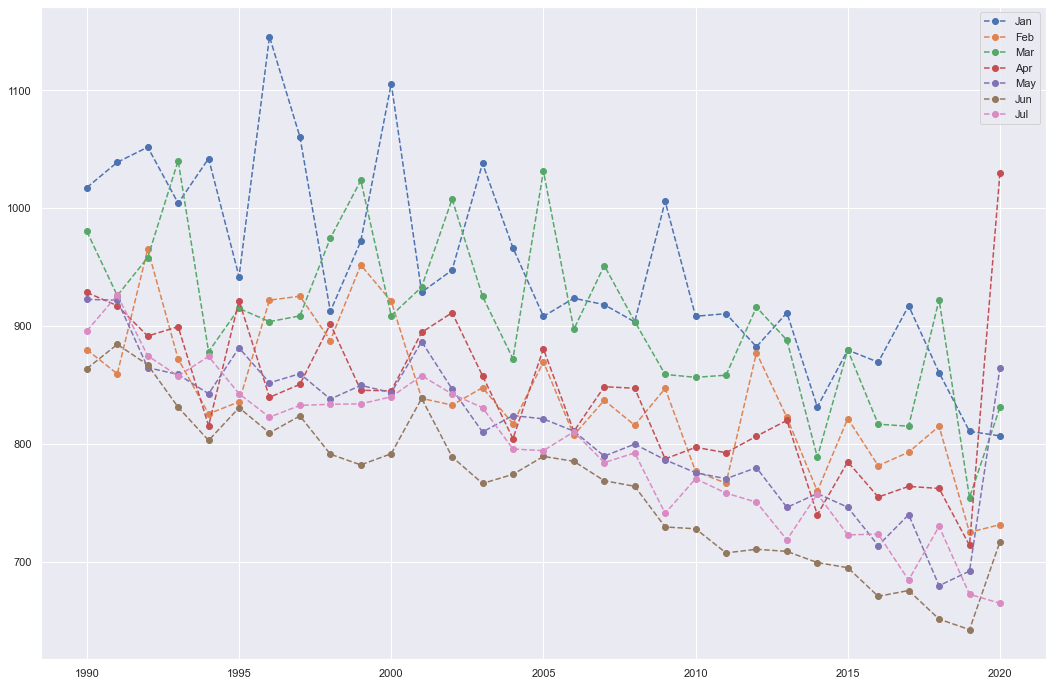

In [244]:
plt.figure(figsize=(18,12))
for month in years.columns:
    
    plt.plot(years.index,years[month],'o--',label=month)
    
plt.legend(loc='upper right')


month    Jan   Feb    Mar    Apr   May   Jun   Jul
year                                              
1990   10.18  8.80   9.80   9.28  9.23  8.64  8.96
1991   10.39  8.59   9.26   9.17  9.22  8.84  9.26
1992   10.52  9.65   9.58   8.92  8.65  8.67  8.75
1993   10.04  8.72  10.40   8.99  8.59  8.31  8.58
1994   10.42  8.26   8.78   8.15  8.43  8.03  8.74
1995    9.42  8.36   9.15   9.22  8.81  8.31  8.43
1996   11.46  9.22   9.04   8.40  8.52  8.09  8.23
1997   10.61  9.25   9.09   8.51  8.60  8.24  8.33
1998    9.12  8.88   9.75   9.02  8.38  7.91  8.34
1999    9.72  9.52  10.24   8.45  8.50  7.82  8.34
2000   11.06  9.21   9.09   8.45  8.44  7.92  8.40
2001    9.29  8.39   9.33   8.95  8.87  8.39  8.58
2002    9.47  8.33  10.08   9.11  8.47  7.89  8.42
2003   10.38  8.48   9.25   8.58  8.10  7.66  8.31
2004    9.66  8.17   8.72   8.04  8.24  7.74  7.96
2005    9.08  8.70  10.32   8.81  8.21  7.89  7.94
2006    9.24  8.07   8.97   8.11  8.11  7.85  8.10
2007    9.18  8.37   9.51   8.4

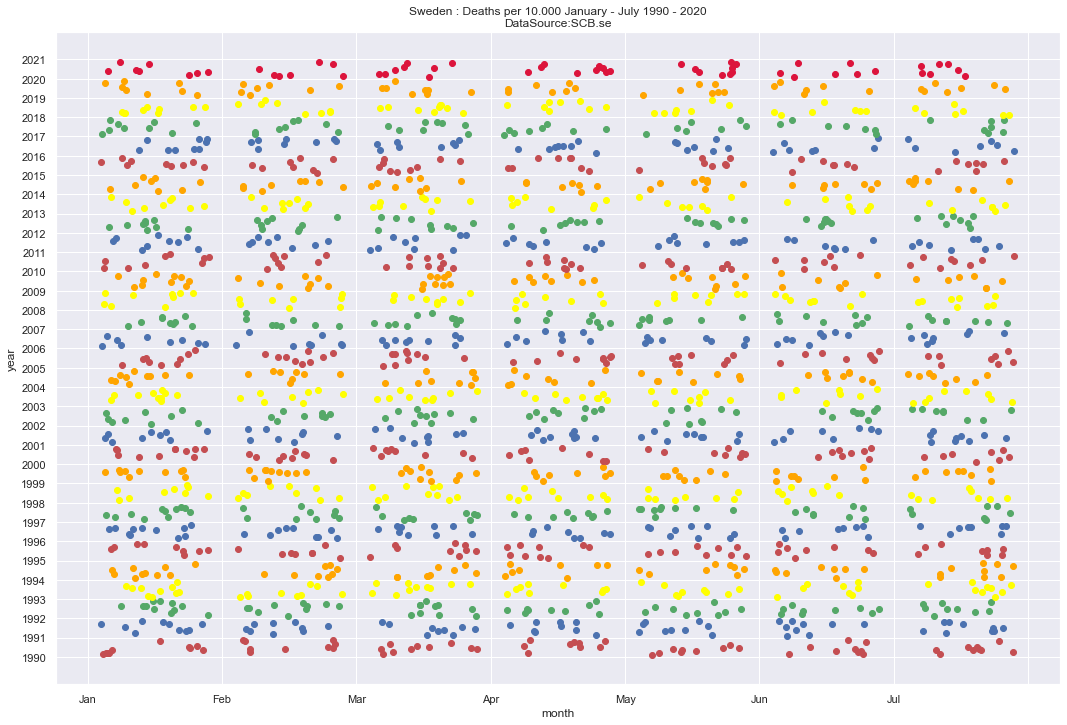

In [245]:
scatter_scale_factor = 100
#years = years[:10]
years = years / scatter_scale_factor

colors =['r','b','g','yellow','orange'] * 6
colors.append('crimson')

plt.figure(figsize=(18,12))
plt.title('Sweden : Deaths per 10.000 January - {} 1990 - 2020\nDataSource:SCB.se'.format(
    pd.Timestamp(last_complete_month).month_name()))
plt.grid(True)

for r in range(len(years.index)):
    for c in range(len(years.columns) ):
        ndots = int(np.round(years.iloc[r,c]))
        
        
        for i in range (0,ndots):
            rr = 0.1 + r + 0.8 * np.random.random()
            cc = 0.1 + c + 0.8 * np.random.random()
            
            plt.scatter(cc,rr,color = colors[r])

yticks = range(1990,2022)

random_labels = list('ABCDEFGHIJKLMNOPQRSTUVXYZ')
random_labels.extend(('AA','BB','CC','DD','EE','FF'))
#yticks = random_labels

plt.yticks(range(len(years) + 1),yticks)

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul']
plt.xticks(range(len(years.columns) + 1),month_names)

plt.ylabel('year')
plt.xlabel('month')
print (years)
plt.savefig('scb_1990_2019_deaths_scatter.jpg',format='jpg')


In [246]:
print (years)
deaths_per_month = years.sum(axis=0)


deaths_per_year = years.sum(axis=1) 

print (deaths_per_month)
print (deaths_per_year)

month    Jan   Feb    Mar    Apr   May   Jun   Jul
year                                              
1990   10.18  8.80   9.80   9.28  9.23  8.64  8.96
1991   10.39  8.59   9.26   9.17  9.22  8.84  9.26
1992   10.52  9.65   9.58   8.92  8.65  8.67  8.75
1993   10.04  8.72  10.40   8.99  8.59  8.31  8.58
1994   10.42  8.26   8.78   8.15  8.43  8.03  8.74
1995    9.42  8.36   9.15   9.22  8.81  8.31  8.43
1996   11.46  9.22   9.04   8.40  8.52  8.09  8.23
1997   10.61  9.25   9.09   8.51  8.60  8.24  8.33
1998    9.12  8.88   9.75   9.02  8.38  7.91  8.34
1999    9.72  9.52  10.24   8.45  8.50  7.82  8.34
2000   11.06  9.21   9.09   8.45  8.44  7.92  8.40
2001    9.29  8.39   9.33   8.95  8.87  8.39  8.58
2002    9.47  8.33  10.08   9.11  8.47  7.89  8.42
2003   10.38  8.48   9.25   8.58  8.10  7.66  8.31
2004    9.66  8.17   8.72   8.04  8.24  7.74  7.96
2005    9.08  8.70  10.32   8.81  8.21  7.89  7.94
2006    9.24  8.07   8.97   8.11  8.11  7.85  8.10
2007    9.18  8.37   9.51   8.4

Text(0, 0.5, 'year')

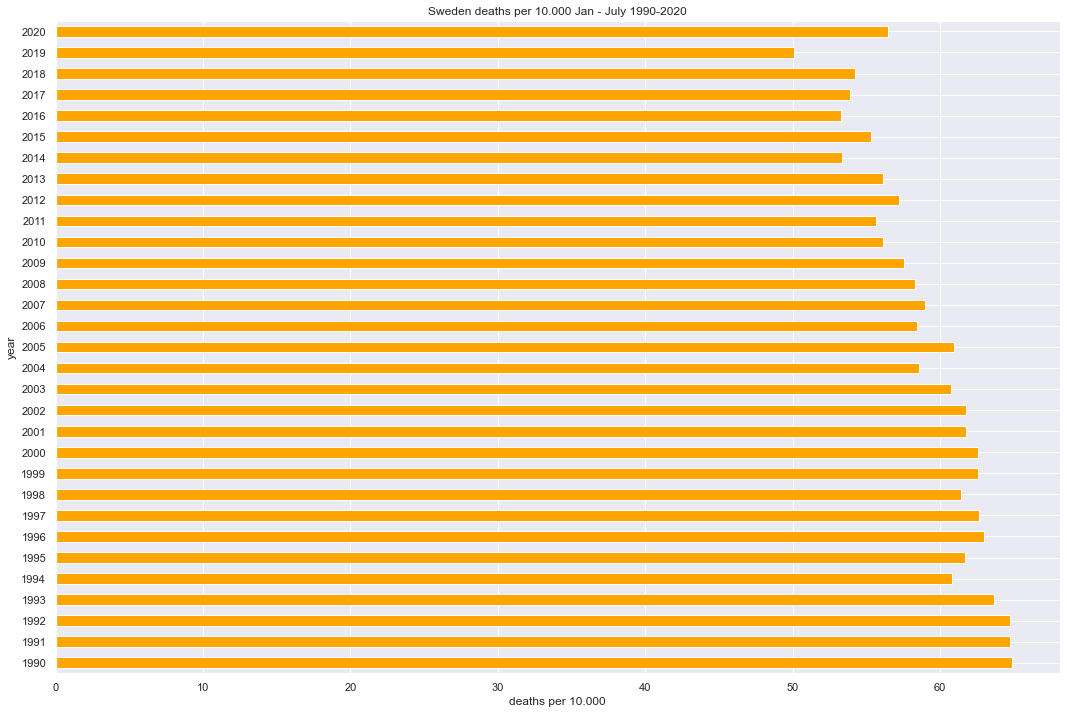

In [247]:
deaths_per_year.plot(kind='barh',title='Sweden deaths per 10.000 Jan - {} 1990-2020'.format(
    pd.Timestamp(last_complete_month).month_name()),color='orange',
                     figsize=(18,12))

plt.xlabel('deaths per 10.000')
plt.ylabel('year')

In [248]:
years = years_per_M
print (years[:-1])

average_2015_2019 = years.loc[2015:2019].mean()
print (average_2015_2019)
monthly_average = years[:-1].mean()
print (monthly_average)
monthly_percentiles = years[:-1].quantile(1,axis=0)
monthly_percentiles


month      Jan     Feb      Mar     Apr     May     Jun     Jul
year                                                           
1990   1017.50  879.91   980.25  928.45  922.63  863.85  895.86
1991   1038.97  859.43   925.83  917.27  921.90  884.42  926.18
1992   1051.77  965.37   958.12  891.51  864.70  867.12  874.71
1993   1004.22  872.03  1040.35  899.47  858.88  831.09  857.62
1994   1042.15  825.51   878.25  815.30  842.52  802.94  874.17
1995    941.90  835.64   914.97  921.53  881.47  830.67  842.55
1996   1145.57  921.93   903.73  839.50  851.83  809.32  822.66
1997   1060.51  925.33   908.61  850.51  859.55  823.72  832.65
1998    912.44  887.70   974.55  901.71  838.01  791.25  833.60
1999    971.97  951.77  1023.54  845.46  849.64  782.15  833.95
2000   1105.73  920.99   908.84  845.00  843.54  791.64  839.94
2001    928.71  838.58   933.09  894.59  886.73  838.58  857.88
2002    947.46  832.92  1007.74  911.33  846.57  788.97  842.32
2003   1038.03  847.74   925.17  857.76 

month
Jan    1145.57
Feb     965.37
Mar    1040.35
Apr     928.45
May     922.63
Jun     884.42
Jul     926.18
Name: 1, dtype: float64

In [249]:
### USES fhm_scb_dead.csv

fhm_dead = pd.read_csv('fhm_scb_dead.csv',sep=';',header=0,index_col=0,parse_dates=True,names=['fhm_dead'])
fhm_dead


,fhm_dead
2020-03-11,1
2020-03-12,0
2020-03-13,1
2020-03-14,1
2020-03-15,2
...,...
2020-08-03,0
2020-08-04,1
2020-08-05,0
2020-08-06,0


In [250]:
fhm_monthly = fhm_dead.groupby(fhm_dead.index.month).sum()
fhm_monthly['fhm_dead_per_M'] = fhm_monthly['fhm_dead'] / (curr_pop / 1e6)
fhm_monthly.at[1,:] = [0,0]
fhm_monthly.at[2,:] = [0,0]
fhm_monthly.sort_index(inplace=True)
fhm_monthly

,fhm_dead,fhm_dead_per_M
1,0.0,0.00
2,0.0,0.00
3,332.0,32.15
4,2544.0,246.33
5,1757.0,170.13
6,865.0,83.76
7,256.0,24.79
8,4.0,0.39


In [251]:
scb_dead_2020_per_M = pd.DataFrame(years.loc[2020].copy())
scb_dead_2020_per_M['month_nr'] = range(1,len(scb_dead_2020_per_M) + 1)
scb_dead_2020_per_M.reset_index(inplace=True)
scb_dead_2020_per_M.set_index('month_nr',inplace=True)
scb_dead_2020_per_M

,month,2020
month_nr,,
1,Jan,806.76
2,Feb,731.45
3,Mar,831.01
4,Apr,1030.01
5,May,864.39
6,Jun,716.95
7,Jul,664.78


In [252]:
all_deaths = scb_dead_2020_per_M.join(fhm_monthly)
all_deaths.rename(columns={2020 : 'scb_dead_per_M',
                          'fhm_dead_per_M' : 'covid_deaths_per_M'},inplace=True)
all_deaths['other_deaths_per_M'] = all_deaths['scb_dead_per_M'] - all_deaths['covid_deaths_per_M']
all_deaths['pct_covid_deaths'] = all_deaths['covid_deaths_per_M'] / all_deaths['scb_dead_per_M'] * 100
all_deaths['pct_other_deaths'] = all_deaths['other_deaths_per_M'] / all_deaths['scb_dead_per_M'] * 100
all_deaths

,month,scb_dead_per_M,fhm_dead,covid_deaths_per_M,other_deaths_per_M,pct_covid_deaths,pct_other_deaths
month_nr,,,,,,,
1,Jan,806.76,0.0,0.00,806.76,0.00,100.00
2,Feb,731.45,0.0,0.00,731.45,0.00,100.00
3,Mar,831.01,332.0,32.15,798.86,3.87,96.13
4,Apr,1030.01,2544.0,246.33,783.68,23.92,76.08
5,May,864.39,1757.0,170.13,694.26,19.68,80.32
6,Jun,716.95,865.0,83.76,633.19,11.68,88.32
7,Jul,664.78,256.0,24.79,640.00,3.73,96.27


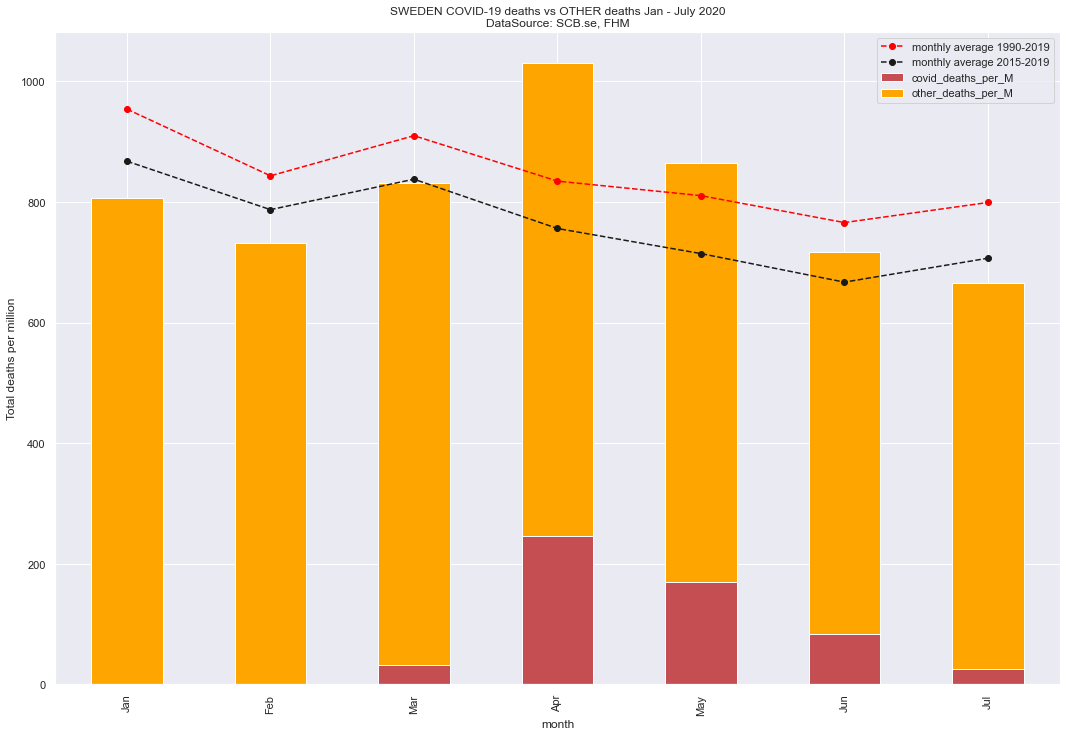

In [253]:
all_deaths.plot(title='SWEDEN COVID-19 deaths vs OTHER deaths Jan - {} 2020\nDataSource: SCB.se, FHM'.format(
    pd.Timestamp(last_complete_month).month_name()),
                kind='bar',x='month',color=['r','orange'],
                y=['covid_deaths_per_M','other_deaths_per_M'],stacked=True,figsize=(18,12))

plt.ylabel('Total deaths per million')
plt.plot(monthly_average.index,monthly_average,'o--',label='monthly average 1990-2019',color='red')
plt.plot(average_2015_2019.index,average_2015_2019,'o--',label='monthly average 2015-2019',color='k')

plt.legend(loc='upper right')
plt.savefig('scb_fhm_covid_vs_other_abs.jpg',format='jpg')

In [254]:
average_2015_2019

month
Jan    867.45
Feb    787.15
Mar    837.65
Apr    755.93
May    714.31
Jun    666.96
Jul    706.61
dtype: float64

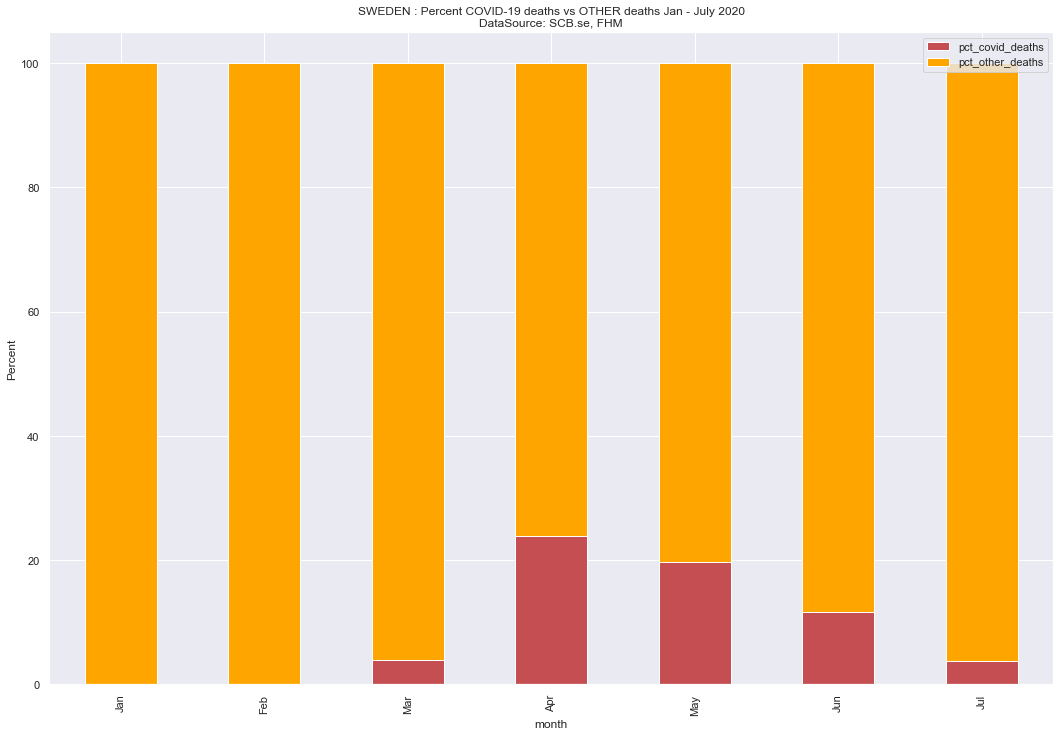

In [255]:
all_deaths.plot(title='SWEDEN : Percent COVID-19 deaths vs OTHER deaths Jan - {} 2020\nDataSource: SCB.se, FHM'.format(
    pd.Timestamp(last_complete_month).month_name()),
                kind='bar',x='month',color=['r','orange'],
                y=['pct_covid_deaths','pct_other_deaths'],stacked=True,figsize=(18,12))

plt.ylabel('Percent')
plt.savefig('scb_fhm_covid_vs_other_rel.jpg',format='jpg')

In [256]:
print (years.min())
print (years.max())
print (years)


month
Jan    806.76
Feb    724.95
Mar    754.39
Apr    713.91
May    679.66
Jun    642.36
Jul    664.78
dtype: float64
month
Jan    1145.57
Feb     965.37
Mar    1040.35
Apr    1030.01
May     922.63
Jun     884.42
Jul     926.18
dtype: float64
month      Jan     Feb      Mar      Apr     May     Jun     Jul
year                                                            
1990   1017.50  879.91   980.25   928.45  922.63  863.85  895.86
1991   1038.97  859.43   925.83   917.27  921.90  884.42  926.18
1992   1051.77  965.37   958.12   891.51  864.70  867.12  874.71
1993   1004.22  872.03  1040.35   899.47  858.88  831.09  857.62
1994   1042.15  825.51   878.25   815.30  842.52  802.94  874.17
1995    941.90  835.64   914.97   921.53  881.47  830.67  842.55
1996   1145.57  921.93   903.73   839.50  851.83  809.32  822.66
1997   1060.51  925.33   908.61   850.51  859.55  823.72  832.65
1998    912.44  887.70   974.55   901.71  838.01  791.25  833.60
1999    971.97  951.77  1023.54   845.46

In [257]:
years.sum(axis=1).sort_values(ascending=False)

year
1990    6488.46
1991    6474.00
1992    6473.30
1993    6363.67
1996    6294.53
1997    6260.89
1999    6258.47
2000    6255.69
2001    6178.16
2002    6177.31
1995    6168.72
1998    6139.26
2005    6094.77
1994    6080.84
2003    6075.87
2007    5897.47
2004    5853.92
2006    5845.11
2008    5826.38
2009    5756.00
2012    5723.17
2020    5645.35
2013    5615.11
2010    5612.41
2011    5564.04
2015    5529.48
2018    5421.02
2017    5389.00
2014    5334.37
2016    5330.18
2019    5010.66
dtype: float64

In [258]:
cum_mean_2015_2019 = years.sum(axis=1)
cum_mean_2015_2019 = cum_mean_2015_2019.loc[2015:2020].mean()
print (cum_mean_2015_2019)

cum_mean_1990_2019 = years.sum(axis=1)
cum_mean_1990_2019 = cum_mean_1990_2019.loc[1990:2020].mean()
print (cum_mean_1990_2019)

print (years.loc[2020].sum())

5387.614720777091
5907.665149515704
5645.350624418795


In [259]:
scb_2020_copy = scb_2020_orig.copy()
scb_2020_copy.reset_index(inplace=True)
#scb_2020_copy['Månad'] = scb_2020_copy['Månad'].apply(date_parser)


scb_2020_copy['Månad'] = pd.Categorical(scb_2020_copy['Månad'],['januari','februari','mars','april','maj','juni',
                                                      'juli','augusti','september','oktober','november','december'])

scb_2020_copy.sort_values('Månad',inplace=True)
scb_2020_copy.drop(['min_2015_2019','max_2015_2019'],axis=1,inplace=True)

scb_2020_copy['excess_2015'] = scb_2020_copy['2020'] - scb_2020_copy['2015-2019']
scb_2020_copy['excess_2015_cum'] = scb_2020_copy['excess_2015'].cumsum()
scb_2020_copy['2020_cum'] = scb_2020_copy['2020'].cumsum()
scb_2020_copy['2020_per_M'] = scb_2020_copy['2020'] / (curr_pop / 1e6)
scb_2020_copy['2020_per_M_cum'] = scb_2020_copy['2020_per_M'].cumsum()
scb_2020_copy['excess_2015_per_M'] = scb_2020_copy['excess_2015'] / (curr_pop / 1e6)
scb_2020_copy['excess_2015_per_M_cum'] = scb_2020_copy['excess_2015_per_M'].cumsum()
scb_2020_copy

,Månad,2020,2015-2019,excess_2015,excess_2015_cum,2020_cum,2020_per_M,2020_per_M_cum,excess_2015_per_M,excess_2015_per_M_cum
3,januari,8331.91,8805.88,-473.97,-473.97,8331.91,806.76,806.76,-45.89,-45.89
2,februari,7554.13,8188.21,-634.08,-1108.05,15886.04,731.45,1538.21,-61.40,-107.29
7,mars,8582.28,8483.75,98.53,-1009.52,24468.32,831.01,2369.22,9.54,-97.75
0,april,10637.55,7663.60,2973.95,1964.43,35105.87,1030.01,3399.23,287.96,190.21
6,maj,8927.05,7235.12,1691.93,3656.36,44032.92,864.39,4263.62,163.83,354.04
5,juni,7404.32,6733.01,671.31,4327.67,51437.24,716.95,4980.57,65.00,419.04
4,juli,6865.62,7130.81,-265.19,4062.48,58302.86,664.78,5645.35,-25.68,393.36
1,augusti,831.14,1602.46,-771.32,3291.15,59134.00,80.48,5725.83,-74.69,318.68


In [260]:
death_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
månad,,,,,,,,,,,,,,,,,,,,,
January,8741,8981,9142,8782,9188,8324,10132,9383,8079,8613,...,8552,8634,8432,8789,8103,8665,8689,9282,8803,8372
February,7559,7429,8391,7626,7278,7385,8154,8187,7860,8434,...,7313,7270,8384,7932,7407,8092,7811,8025,8337,7487
March,8421,8003,8328,9098,7743,8086,7993,8039,8629,9070,...,8064,8139,8753,8565,7688,8666,8163,8248,9437,7791
April,7976,7929,7749,7866,7188,8144,7425,7525,7984,7492,...,7505,7515,7707,7908,7212,7731,7545,7731,7797,7373
May,7926,7969,7516,7511,7428,7790,7534,7605,7420,7529,...,7302,7306,7452,7196,7387,7351,7134,7488,6953,7147
June,7421,7645,7537,7268,7079,7341,7158,7288,7006,6931,...,6854,6709,6790,6836,6816,6846,6703,6837,6663,6634
July,7696,8006,7603,7500,7707,7446,7276,7367,7381,7390,...,7254,7190,7172,6931,7383,7120,7231,6927,7468,6944
August,7499,7529,7219,7267,7162,7266,7159,7345,7357,7507,...,7010,7019,7070,6934,7195,6814,7157,6996,6971,7031
September,7367,7622,7250,7308,7654,7335,7136,7296,6982,7200,...,7082,7101,6937,6842,6990,7006,6871,6913,6952,6855


In [261]:
scb_2020_abs = scb_2020_orig.reset_index()

scb_2020_abs['Månad'] = scb_2020_abs['Månad'].apply(date_parser)
scb_2020_abs['Månad'] = pd.Categorical(scb_2020_abs['Månad'],['January','February','March',
                                                             'April','May','June','July','August'])
scb_2020_abs.set_index('Månad',inplace=True)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.


In [262]:
scb_2020_abs.sort_index(inplace=True)
scb_2020_abs

,2020,2015-2019,min_2015_2019,max_2015_2019
Månad,,,,
January,8331.91,8805.88,8421.58,9323.03
February,7554.13,8188.21,7514.93,8371.94
March,8582.28,8483.75,7799.29,9459.65
April,10637.55,7663.60,7403.66,7821.41
May,8927.05,7235.12,6961.73,7510.87
June,7404.32,6733.01,6647.43,6837.17
July,6865.62,7130.81,6926.63,7455.76
August,831.14,1602.46,1532.73,1681.37


In [263]:
scb_2020_abs = pd.concat([death_df,scb_2020_abs['2020']],axis=1)
death_df.reset_index(inplace=True)
death_df

,månad,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,January,8741,8981,9142,8782,9188,8324,10132,9383,8079,...,8552,8634,8432,8789,8103,8665,8689,9282,8803,8372
1,February,7559,7429,8391,7626,7278,7385,8154,8187,7860,...,7313,7270,8384,7932,7407,8092,7811,8025,8337,7487
2,March,8421,8003,8328,9098,7743,8086,7993,8039,8629,...,8064,8139,8753,8565,7688,8666,8163,8248,9437,7791
3,April,7976,7929,7749,7866,7188,8144,7425,7525,7984,...,7505,7515,7707,7908,7212,7731,7545,7731,7797,7373
4,May,7926,7969,7516,7511,7428,7790,7534,7605,7420,...,7302,7306,7452,7196,7387,7351,7134,7488,6953,7147
5,June,7421,7645,7537,7268,7079,7341,7158,7288,7006,...,6854,6709,6790,6836,6816,6846,6703,6837,6663,6634
6,July,7696,8006,7603,7500,7707,7446,7276,7367,7381,...,7254,7190,7172,6931,7383,7120,7231,6927,7468,6944
7,August,7499,7529,7219,7267,7162,7266,7159,7345,7357,...,7010,7019,7070,6934,7195,6814,7157,6996,6971,7031
8,September,7367,7622,7250,7308,7654,7335,7136,7296,6982,...,7082,7101,6937,6842,6990,7006,6871,6913,6952,6855
9,October,7587,7463,7708,7539,7509,7517,7511,7618,7637,...,7454,7612,7484,7278,7453,7239,7484,7587,7440,7536


In [268]:
scb_2020_abs.reset_index(inplace=True)

In [272]:
scb_2020_abs['index'] = pd.Categorical(scb_2020_abs['index'],['January','February','March','April',
                                                             'May','June','July','August',
                                                             'September','October','November','December'])

scb_2020_abs.sort_values('index',inplace=True)
scb_2020_abs.set_index('index',inplace=True)
scb_2020_abs
                                       
                                       

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
index,,,,,,,,,,,,,,,,,,,,,
January,8741,8981,9142,8782,9188,8324,10132,9383,8079,8613,...,8634,8432,8789,8103,8665,8689,9282,8803,8372,8331.91
February,7559,7429,8391,7626,7278,7385,8154,8187,7860,8434,...,7270,8384,7932,7407,8092,7811,8025,8337,7487,7554.13
March,8421,8003,8328,9098,7743,8086,7993,8039,8629,9070,...,8139,8753,8565,7688,8666,8163,8248,9437,7791,8582.28
April,7976,7929,7749,7866,7188,8144,7425,7525,7984,7492,...,7515,7707,7908,7212,7731,7545,7731,7797,7373,10637.55
May,7926,7969,7516,7511,7428,7790,7534,7605,7420,7529,...,7306,7452,7196,7387,7351,7134,7488,6953,7147,8927.05
June,7421,7645,7537,7268,7079,7341,7158,7288,7006,6931,...,6709,6790,6836,6816,6846,6703,6837,6663,6634,7404.32
July,7696,8006,7603,7500,7707,7446,7276,7367,7381,7390,...,7190,7172,6931,7383,7120,7231,6927,7468,6944,6865.62
August,7499,7529,7219,7267,7162,7266,7159,7345,7357,7507,...,7019,7070,6934,7195,6814,7157,6996,6971,7031,831.14
September,7367,7622,7250,7308,7654,7335,7136,7296,6982,7200,...,7101,6937,6842,6990,7006,6871,6913,6952,6855,NaN


In [332]:
total_abs_ytd = scb_2020_abs[:pd.to_datetime(last_complete_month).month_name()].sum()
total_abs_ytd

1990    55740.00
1991    55962.00
1992    56266.00
1993    55651.00
1994    53611.00
1995    54516.00
1996    55672.00
1997    55394.00
1998    54359.00
1999    55459.00
2000    55568.00
2001    55042.00
2002    55230.00
2003    54535.00
2004    52752.00
2005    55144.00
2006    53268.00
2007    54156.00
2008    53931.00
2009    53765.00
2010    52844.00
2011    52763.00
2012    54690.00
2013    54157.00
2014    51996.00
2015    54471.00
2016    53276.00
2017    54538.00
2018    55458.00
2019    51748.00
2020    58302.86
dtype: float64

In [306]:
year_pairs_abs = total_abs_ytd.iloc[1::2].reset_index() + total_abs_ytd.iloc[2::2].reset_index()
year_pairs_abs['index'] = year_pairs_abs['index'].apply(lambda x : x[:4] + '_' + x[4:])
year_pairs_abs.columns = ['years','deaths']
year_pairs_abs

,years,deaths
0,1991_1992,112228.00
1,1993_1994,109262.00
2,1995_1996,110188.00
3,1997_1998,109753.00
4,1999_2000,111027.00
5,2001_2002,110272.00
6,2003_2004,107287.00
7,2005_2006,108412.00
8,2007_2008,108087.00
9,2009_2010,106609.00


In [311]:
pop = scb_pop.T[1:]

In [312]:
pop = pop.iloc[::2].reset_index()
pop.columns=['year','pop']
pop

,year,pop
0,1991,8644119
1,1993,8745109
2,1995,8837496
3,1997,8847625
4,1999,8861426
5,2001,8909128
6,2003,8975670
7,2005,9047752
8,2007,9182927
9,2009,9340682


In [315]:
year_pairs_abs['dead_per_M'] = year_pairs_abs['deaths'] / (pop['pop'] / 1e6)
year_pairs_abs.set_index('years',inplace=True)
year_pairs_abs

,deaths,dead_per_M
years,,
1991_1992,112228.00,12983.16
1993_1994,109262.00,12494.07
1995_1996,110188.00,12468.24
1997_1998,109753.00,12404.80
1999_2000,111027.00,12529.25
2001_2002,110272.00,12377.42
2003_2004,107287.00,11953.09
2005_2006,108412.00,11982.20
2007_2008,108087.00,11770.43


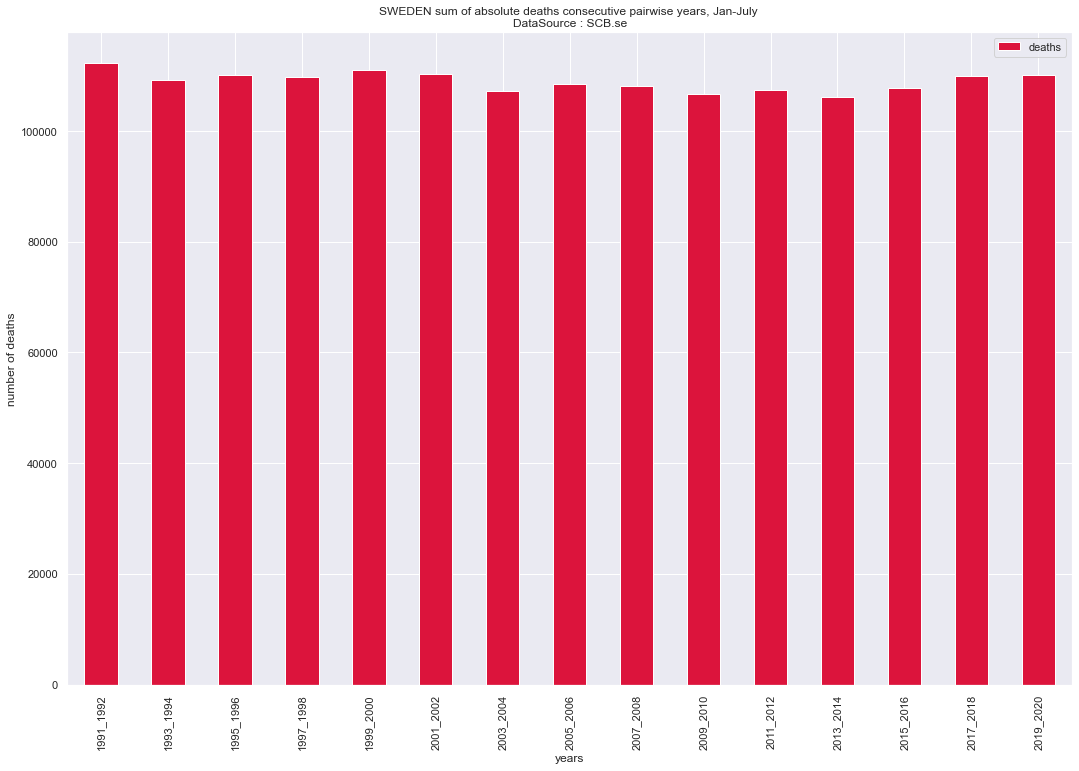

In [333]:
year_pairs_abs.plot(figsize=(18,12),y='deaths',kind='bar',color='crimson',
                   title='SWEDEN sum of absolute deaths consecutive pairwise years, Jan-{} \nDataSource : SCB.se'.format(
                   pd.to_datetime(last_complete_month).month_name()))
plt.ylabel('number of deaths')

plt.savefig('pair_abs_deaths.jpg',format='jpg',dpi=400)

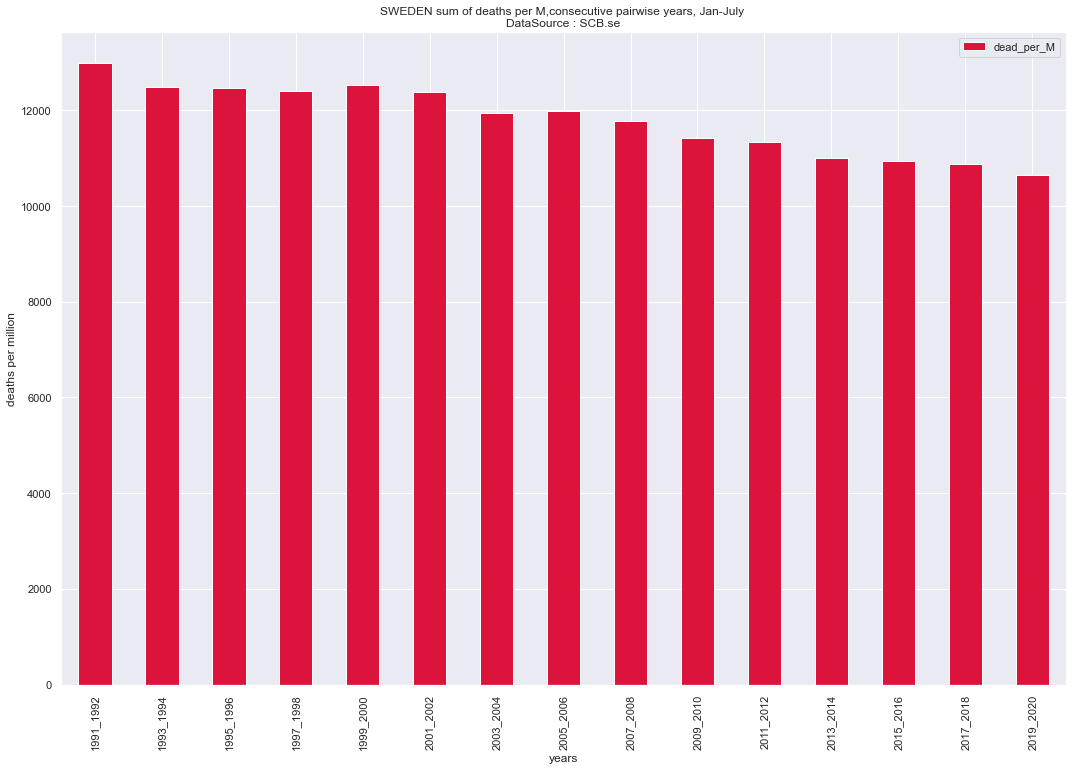

In [334]:
year_pairs_abs.plot(figsize=(18,12),y='dead_per_M',kind='bar',color='crimson',
                   title='SWEDEN sum of deaths per M,consecutive pairwise years, Jan-{} \nDataSource : SCB.se'.format(
                   pd.to_datetime(last_complete_month).month_name()))
plt.ylabel('deaths per million')

plt.savefig('pair_rel_deaths.jpg',format='jpg',dpi=400)

In [331]:
pd.to_datetime(last_complete_month).month_name()

'July'